# 十二、多元分析
多元分析 (multivariate analysis) 是多变量的统计分析方法, 内容广泛, 通常包括**回归分析、判别分析、主成分分析、因子分析、聚类分析、典型相关分析、对应分析**等内容, 限于篇幅, 本章介绍判别分析、主成分分析、因子分析、聚类分析的部分内容.

## 1. 判别分析
判别分析是一种**分类方法**, 它是根据已掌握的每个类别的若干样本的数据信息, 求出判别函数, 再根据判别函数判别未知样本点所属的类别.
假定已有 $r$ 类判别对象 $A_{1}, A_{2}, \cdots, A_{r}$, 每一类 $A_{i}$ 由 $m$ 个指标的 $n_{i}$ 个样本确定, 即 $A_{i}$ 类有样本值矩阵
$$
\boldsymbol{A}_{i}=\left[\begin{array}{cccc}
a_{11}^{(i)} & a_{12}^{(i)} & \cdots & a_{1 m}^{(i)} \\
a_{21}^{(i)} & a_{22}^{(i)} & \cdots & a_{2 m}^{(i)} \\
\vdots & \vdots & & \vdots \\
a_{n_{i} 1}^{(i)} & a_{n_{i} 2}^{(i)} & \cdots & a_{n_{i} m}^{(i)}
\end{array}\right]=\left[\begin{array}{c}
\left(\boldsymbol{a}_{1}^{(i)}\right)^{\mathrm{T}} \\
\left(\boldsymbol{a}_{2}^{(i)}\right)^{\mathrm{T}} \\
\vdots \\
\left(\boldsymbol{a}_{n_{i}}^{(i)}\right)^{\mathrm{T}}
\end{array}\right]
$$
其中, $\boldsymbol{A}_{i}$ 矩阵的第 $k$ 行是 $A_{i}$ 的第 $k$ 个样本点的观测值向量. 问待判定对象 $\boldsymbol{x}=$ $\left[x_{1}, x_{2}, \cdots, x_{m}\right]^{\mathrm{T}}$ 属于 $A_{i}(i=1,2, \cdots, r)$ 的哪一类?
为了能对不同的 $A_{i}(i=1,2, \cdots, r)$ 作出判别, 应有一个一般规则, 依据 $\boldsymbol{x}$ 的值, 便可以根据该规则作出判断, 称这样的规则为**判别规则**. 判别规则往往通过函数表达, 这些函数称为**判别函数**, 记为 $W(i, \boldsymbol{x})(i=1,2, \cdots, r)$.
记 $n=\sum_{i=1}^{r} n_{i}, \boldsymbol{\mu}_{i}$ 和 $\boldsymbol{L}_{i}$ 分别表示第 $A_{i}(i=1,2, \cdots, r)$ 类的样本**均值向量**和**离差矩阵**, 即
$$
\boldsymbol{\mu}_{i}=\frac{1}{n_{i}} \sum_{k=1}^{n_{i}} \boldsymbol{a}_{k}^{(i)}, \quad \boldsymbol{L}_{i}=\sum_{k=1}^{n_{i}}\left(\boldsymbol{a}_{k}^{(i)}-\boldsymbol{\mu}_{i}\right)\left(\boldsymbol{a}_{k}^{(i)}-\boldsymbol{\mu}_{i}\right)^{\mathrm{T}},
$$
并用 $\boldsymbol{x} \in A_{i}$ 表示 $\boldsymbol{x}$ 归属于 $A_{i}$.

### 1.1 距离判别法
距离判别法就是建立待判定对象 $\boldsymbol{x}$ 到 $A_{i}$ 的距离 $d\left(\boldsymbol{x}, A_{i}\right)$, 然后根据距离最近原则进行判别, 即判别函数 $W(i, \boldsymbol{x})=d\left(\boldsymbol{x}, A_{i}\right)$. 若 $W(k, \boldsymbol{x})=\min \{W(i, \boldsymbol{x}) \mid i=$ $1,2, \cdots, r\}$, 则 $\boldsymbol{x} \in A_{k}$.
距离 $d\left(\boldsymbol{x}, A_{i}\right)$ 一般采用 **Mahalanobis 距离 (马氏距离)**.
#### 1.1.1 r个总体协方差矩阵相等的情况
待判对象 $\boldsymbol{x}$ 到第 $A_{i}(i=1,2, \cdots, r)$ 类的马氏距离定义为
$$
d\left(\boldsymbol{x}, A_{i}\right)=\left(\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)\right)^{\frac{1}{2}}
$$
其中, $\boldsymbol{\Sigma}=\frac{1}{n-r} \sum_{i=1}^{r} \boldsymbol{L}_{i}$.
#### 1.1.2 r个总体协方差矩阵都不相等的情况
待判对象 $\boldsymbol{x}$ 到第 $A_{i}(i=1,2, \cdots, r)$ 类的马氏距离定义为
$$
d\left(\boldsymbol{x}, A_{i}\right)=\sqrt{\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)^{\mathrm{T}} \boldsymbol{\Sigma}_{i}^{-1}\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)}
$$
其中, $\boldsymbol{\Sigma}_{i}=\frac{1}{n_{i}-1} \boldsymbol{L}_{i}$.
#### 1.1.3 sklearn.neighbors 模块的 KNeighborsClassifier 函数
sklearn.neighbors 模块的 KNeighborsClassifier 函数实现**距离判别法**的分类, 其调用格式为

KNeighborsClassifier (n_neighbors $=5$, weights $=$ ' uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None)
其中, 第一个参数 n_neighbors 指定分类的类别数; algorithm 的取值可以为：'auto', 'ball_tree', 'kd_tree', 'brute'; metric 的默认取值为 'minkowski', 即默认的距离为欧氏距离, metric 的取值及其含义见下表.

表 metric的取值及其含义 $\left(x=\left[x_{1}, x_{2}, \cdots, x_{m}\right], y=\left[y_{1}, y_{2}, \cdots, y_{m}\right]\right)$

\begin{array}{ccl}
\hline
\text { 字符串 } & \text{metic_params} & \text { 含义 } \\
\hline
\text{'euclidean'} & \cdot & \boldsymbol{x}, \boldsymbol{y} \text{的欧氏距离:} \sqrt{\sum_{i=1}^{m}\left(x_{i}-y_{i}\right)^{2}}\\
\text{'manhattan'} & \cdot & \boldsymbol{x}, \boldsymbol{y} \text{的曼哈顿距离:} \sum_{i=1}^{m}\left|x_{i}-y_{i}\right|\\
\text{'chebyshev'} & \cdot & \boldsymbol{x}, \boldsymbol{y} \text{的切比雪夫距离:} \max \left\{\left|x_{i}-y_{i}\right|, i=1,2, \cdots, m\right\}\\
\text { 'minkowski' } & p & \boldsymbol{x}, \boldsymbol{y} \text { 的闵可夫斯基距离: } \sqrt[p]{\sum_{i=1}^{m}\left|x_{i}-y_{i}\right|^{p}}, p=1 \text { 为曼哈顿距离, } p=2 \text { 为欧氏距离 } \\
\text { 'wminkowski' } &  p, w & \boldsymbol{x}, \boldsymbol{y} \text { 的带权重闵可夫斯基距离: } \sqrt[p]{\sum_{i=1}^{m}\left(w_{i} \mid x_{i}-y_{i}\right)^{p}} \text {, 其中 } \boldsymbol{w}=\left[w_{1}, w_{2}, \cdots, w_{m}\right] \text { 为权重 } \\
\text { 'seuclidean' } & V & \text { 标准化欧氏距离, 即各指标变量的数据都标准化为均值为 } 0 \text {, 标准差为 } 1 \\
\text { 'mahalanobis'} & V \text{or} VI & \boldsymbol{x}, \boldsymbol{y} \text { 的马氏距离: } \sqrt{(\boldsymbol{x}-\boldsymbol{x})^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{y})}, \boldsymbol{\Sigma} \text { 为样本的协方差矩阵. 当 } r \text { 个类别的总体相互独立时, }  \boldsymbol{\Sigma} \text { 为单位阵, 此时马氏距离等同于欧氏距离 } \\
\hline
\end{array}

#### 1.1.4 例题

**例** (1989 年国际大学生数学建模竞赛 $\mathrm{A}$ 题: 蠓虫分类) 蠓虫是一种昆 虫, 分为很多类型, 其中有一种名为 Af, 是能传播花粉的益虫; 另一种名为 Apf, 是 会传播疾病的害虫. 这两种类型的蠓虫在形态上十分相似, 很难区别. 现测得 9 只 Af 和 6 只 $\mathrm{Apf}$ 蠓虫的触角长度和翅膀长度数据.
Af:  $(1.24,1.27),(1.36,1.74),(1.38,1.64),(1.38,1.82),(1.38,1.90),(1.40,1.70),(1.48,1.82),(1.54,1.82),(1.56,2.08)$;
Apf: $(1.14,1.78),(1.18,1.96),(1.20,1.86),(1.26,2.00),(1.28,2.00),(1.30,1.96)$.
若两类䖶虫协方差矩阵相等, 试判别 $(1.24,1.80),(1.28,1.84)$ 与 $(1.40,2.04) $ 3只蠓虫属于哪一类.

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

x0 = np.array([
     [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90], [1.40, 1.70], [1.48, 1.82], [1.54, 1.82], [1.56, 2.08], [1.14, 1.78], [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
]) # 输入已知样本数据
x = np.array([
    [1.24, 1.80], [1.28, 1.84], [1.4, 2.04]
])
g = np.hstack([np.ones(9), 2*np.ones(6)]) # g为已知样本数据的类别标号
# print(g)
v = np.cov(x0.T) # 计算协方差
print(v)

knn = KNeighborsClassifier(2, metric='mahalanobis', metric_params={'V': v}) # 马氏距离分类
knn.fit(x0, g)
pre = knn.predict(x)
print("马氏距离分类结果：", pre)
print("马氏距离已知样本的误判率：", 1-knn.score(x0, g))

knn2 = KNeighborsClassifier(2) # 欧式距离分类
knn2.fit(x0, g)
pre2 = knn2.predict(x)
print("欧式距离分类结果：", pre2)
print("欧式距离已知样本的误判率为：", 1-knn2.score(x0, g))

[[0.01596952 0.00347619]
 [0.00347619 0.0383381 ]]
马氏距离分类结果： [2. 2. 1.]
马氏距离已知样本的误判率： 0.0
欧式距离分类结果： [2. 1. 2.]
欧式距离已知样本的误判率为： 0.0


从程序运行结果看, 使用马氏距离分类时, 把前两个样本点判为 Apf, 第三个样本点判为 $\mathrm{Af}$; 使用欧氏距离分类时, 把第一个和第三个样本点判为 Apf, 第二个样本点判为 $A f$, 但两种分类法对已知样本点的误判率都为 0 , 但我们**倾向于使用马氏距离进行分类**.

**例** 从健康人群、硬化症患者和冠心病患者中分别随机选取 10 人、 6 人 和 4 人, 考察了他们各自心电图的 5 个不同指标 (记作 $x_{1}, x_{2}, x_{3}, x_{4}, x_{5}$ ) 如下表所示, 试对两个待判样品作出判断.
表 已知数据和样本
\begin{array}{cccrccc}
\hline
序号 & x_{1} & x_{2} & x_{3} & x_{4} & x_{5} & 类型 \\
\hline
1 & 8.11 & 261.01 & 13.23 & 5.46 & 7.36 & 1 \\
2 & 9.36 & 185.39 & 9.02  & 5.66 & 5.99 & 1 \\
3 & 9.85 & 249.58 & 15.61 & 6.06 & 6.11 & 1 \\
4 & 2.55 & 137.13 & 9.21  & 6.11 & 4.35 & 1 \\
5 & 6.01 & 231.34 & 14.27 & 5.21 & 8.79 & 1 \\
6 & 9.46 & 231.38 & 13.03 & 4.88 & 8.53 & 1 \\
7 & 4.11 & 260.25 & 14.72 & 5.36 & 10.02 & 1 \\
8 & 8.90 & 259.51 & 14.16 & 4.91 & 9.79 & 1 \\
9 & 7.71 & 273.84 & 16.01 & 5.15 & 8.79 & 1 \\
10 & 7.51 & 303.59 & 19.14 & 5.7 & 8.53 & 1 \\
11 & 6.8  & 308.9  & 15.11 & 5.52 & 8.49 & 2 \\
12 & 8.68 & 258.69 & 14.02 & 4.79 & 7.16 & 2 \\
13 & 5.67 & 355.54 & 15.13 & 4.97 & 9.43 & 2 \\
14 & 8.1  & 476.69 & 7.38  & 5.32 & 11.32 & 2 \\
15 & 3.71 & 316.12 & 17.12 & 6.04 & 8.17 & 2 \\
16 & 5.37 & 274.57 & 16.75 & 4.98 & 9.67 & 2 \\
17 & 5.22 & 330.34 & 18.19 & 4.96 & 9.61 & 3 \\
18 & 4.71 & 331.47 & 21.26 & 4.30 & 13.72 & 3\\
19 & 4.71 & 352.5  & 20.79 & 5.07 & 11 & 3\\
20 & 3.36 & 347.31 & 17.9  & 4.65 & 11.19 & 3\\
21 & 8.06 & 231.03 & 14.41 & 5.72 & 6.15 & \text{待判}\\
22 & 9.89 & 409.42 & 19.47 & 5.19 & 10.49 & \text{待判}\\
\hline
\end{array}

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

a = np.array([
    [1,  8.11, 261.01, 13.23, 5.46, 7.36,  1],
    [2,  9.36, 185.39, 9.02,  5.66, 5.99,  1],
    [3,  9.85, 249.58, 15.61, 6.06, 6.11,  1],
    [4,  2.55, 137.13, 9.21,  6.11, 4.35,  1],
    [5,  6.01, 231.34, 14.27, 5.21, 8.79,  1],
    [6,  9.46, 231.38, 13.03, 4.88, 8.53,  1],
    [7,  4.11 ,260.25, 14.72, 5.36, 10.02, 1],
    [8,  8.90, 259.51 ,14.16, 4.91, 9.79,  1],
    [9,  7.71, 273.84 ,16.01, 5.15, 8.79,  1],
    [10, 7.51, 303.59, 19.14, 5.70, 8.53,  1],
    [11, 6.80, 308.90, 15.11, 5.52, 8.49,  2],
    [12, 8.68, 258.69, 14.02, 4.79, 7.16,  2],
    [13, 5.67, 355.54, 15.13, 4.97, 9.43,  2],
    [14, 8.10, 476.69, 7.38,  5.32, 11.32, 2],
    [15, 3.71, 316.12, 17.12, 6.04, 8.17,  2],
    [16, 5.37, 274.57, 16.75, 4.98, 9.67,  2],
    [17, 5.22, 330.34, 18.19, 4.96, 9.61,  3],
    [18, 4.71, 331.47, 21.26, 4.30, 13.72, 3],
    [19, 4.71, 352.50, 20.79, 5.07, 11.00, 3],
    [20, 3.36, 347.31, 17.90, 4.65, 11.19, 3],
    [21, 8.06, 231.03, 14.41, 5.72, 6.15, -1],
    [22, 9.89, 409.42, 19.47, 5.19, 10.49, -1]
]) # 最后一列-1表示待判
x0 = a[:-2, 1:-1].astype(float) # 提取已知样本点的观测值
y0 = a[:-2, -1].astype(int) # 提取样本数据类别编号
x = a[-2:, 1:-1] # 提取待判样本点的观察值
v = np.cov(x0.T) # 计算协方差

knn = KNeighborsClassifier(3, metric='mahalanobis', metric_params={'V': v}) # 马氏距离分类
knn.fit(x0, y0)
pre = knn.predict(x)
print("分类结果", pre)
print("已知样本的误判率为：", 1-knn.score(x0, y0))

分类结果 [1 1]
已知样本的误判率为： 0.15000000000000002


即样品1和样品2都属于第1类。
已知样本的误判率为15%，是比较高的。我们把可以使用的距离判别都测试了一遍，马氏距离的误判率是最低的。

### 1.2 Fisher判别法

Fisher判别法是基于**方差分析**的判别法, 判别函数 $W(\boldsymbol{x})=\boldsymbol{u}^{\mathrm{T}} \boldsymbol{x}$, 其中 $\boldsymbol{u}$ 为判别系数向量, 其计算公式如下:
(1) 计算 $\boldsymbol{L}=\boldsymbol{L}_{1}+\boldsymbol{L}_{2}+\cdots+\boldsymbol{L}_{r}$ 及 $\boldsymbol{L}^{-1}$;
(2) 计算 $\boldsymbol{B}=\sum_{i=1}^{r} n_{i}\left(\boldsymbol{\mu}_{i}-\boldsymbol{\mu}\right)\left(\boldsymbol{\mu}_{i}-\boldsymbol{\mu}\right)^{\mathrm{T}}$, 其中 $\boldsymbol{\mu}=\frac{1}{n} \sum_{i=1}^{r} n_{i} \boldsymbol{\mu}_{i}$;
(3) 计算 $\boldsymbol{B L} \boldsymbol{L}^{-1}$ 的最大特征值对应的特征向量 $\boldsymbol{p}$。特别当 $r=2$ 时, 计算 $\boldsymbol{p}=$ $\boldsymbol{\mu}_{1}-\boldsymbol{\mu}_{2}$
(4) 计算 $\boldsymbol{u}=\boldsymbol{L}^{-1} \boldsymbol{p}$.
为确定判别规则, 计算 $w_{i}=W\left(\boldsymbol{\mu}_{i}\right)=\boldsymbol{u}^{\mathrm{T}} \boldsymbol{\mu}_{i}(i=1,2, \cdots, r)$. 将 $A_{i}$ 重新排序, 使得 $w_{1}<w_{2}<\cdots<w_{r}$, 然后令 $c_{0}=-\infty, c_{i}=\left(w_{i}+w_{i+1}\right) / 2$ 或 $c_{i}=$ $\left(n_{i} w_{i}+n_{i+1} w_{i+1}\right) /\left(n_{i}+n_{i+1}\right)(i=1,2, \cdots, r-1), c_{r}=+\infty$.
Fisher判别规则为: 若 $c_{k-1}<W(\boldsymbol{x})<c_{k}$, 则 $\boldsymbol{x} \in A_{k}$.

**例** 用Fisher准则再判别“蠓虫分类”问题

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x0 = np.array([
    [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90], [1.40, 1.70], [1.48, 1.82], [1.54, 1.82],
    [1.56, 2.08], [1.14, 1.78], [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
]) # 输入已知样本数据

x = np.array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]]) # 输入待判样本点数据
y0 = np.hstack([np.ones(9), 2*np.ones(6)]) # y0为已知样本数据的类别
clf = LDA()
clf.fit(x0, y0)
print("判别结果为：",clf.predict(x))
print("已知样本的误判率为：",1-clf.score(x0,y0))

判别结果为： [2. 2. 2.]
已知样本的误判率为： 0.0


**例** 用Fisher准则再判别“心电图”问题

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

a = np.array([
    [1,  8.11, 261.01, 13.23, 5.46, 7.36,  1],
    [2,  9.36, 185.39, 9.02,  5.66, 5.99,  1],
    [3,  9.85, 249.58, 15.61, 6.06, 6.11,  1],
    [4,  2.55, 137.13, 9.21,  6.11, 4.35,  1],
    [5,  6.01, 231.34, 14.27, 5.21, 8.79,  1],
    [6,  9.46, 231.38, 13.03, 4.88, 8.53,  1],
    [7,  4.11 ,260.25, 14.72, 5.36, 10.02, 1],
    [8,  8.90, 259.51 ,14.16, 4.91, 9.79,  1],
    [9,  7.71, 273.84 ,16.01, 5.15, 8.79,  1],
    [10, 7.51, 303.59, 19.14, 5.70, 8.53,  1],
    [11, 6.80, 308.90, 15.11, 5.52, 8.49,  2],
    [12, 8.68, 258.69, 14.02, 4.79, 7.16,  2],
    [13, 5.67, 355.54, 15.13, 4.97, 9.43,  2],
    [14, 8.10, 476.69, 7.38,  5.32, 11.32, 2],
    [15, 3.71, 316.12, 17.12, 6.04, 8.17,  2],
    [16, 5.37, 274.57, 16.75, 4.98, 9.67,  2],
    [17, 5.22, 330.34, 18.19, 4.96, 9.61,  3],
    [18, 4.71, 331.47, 21.26, 4.30, 13.72, 3],
    [19, 4.71, 352.50, 20.79, 5.07, 11.00, 3],
    [20, 3.36, 347.31, 17.90, 4.65, 11.19, 3],
    [21, 8.06, 231.03, 14.41, 5.72, 6.15, -1],
    [22, 9.89, 409.42, 19.47, 5.19, 10.49, -1]
]) # 最后一列-1表示待判
x0 = a[:-2, 1:-1].astype(float) # 提取已知样本点的观测值
y0 = a[:-2, -1].astype(int) # 提取样本数据类别编号
x = a[-2:, 1:-1] # 提取待判样本点的观察值

clf = LDA()
clf.fit(x0, y0)
print("判别结果为：", clf.predict(x))
print("已知样本的误判率为：", 1-clf.score(x0, y0))

判别结果为： [1 2]
已知样本的误判率为： 0.0


**从上面的例子可以看出，Fisher线性判别法的效果比距离判别法的效果要好。**

### 1.3 贝叶斯判别法

假定 $r$ 个 $m$ 维总体的密度函数分别为已知 $\phi_{i}(\boldsymbol{x})(i=1,2, \cdots, r)$, 且判别之前有足够的理由可认为待判别对象 $x \in A_{i}$ 的概率为 $p_{i}$. 如果没有任何附加先验信息, 通常取 $p_{i}=1 / r$. **贝叶斯判别函数** $W(i, \boldsymbol{x})=p_{i} \phi_{i}(\boldsymbol{x})$, 判别规则为: 若 $W(k, \boldsymbol{x})=\max \{W(i, \boldsymbol{x}) \mid i=1,2, \cdots, r\}$, 则 $\boldsymbol{x} \in A_{k}$. 高斯-贝叶斯分类的函数为 GaussianNB.

**例** 用贝叶斯判别法再判别“蠓虫分类”问题

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

x0 = np.array([
    [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90], [1.40, 1.70], [1.48, 1.82], [1.54, 1.82],
    [1.56, 2.08], [1.14, 1.78], [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
]) # 输入已知样本数据
x = np.array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]]) # 输入待判样本点数据
y0 = np.hstack([np.ones(9), 2*np.ones(6)])  #y0为已知样本数据的类别
clf = GaussianNB()
clf.fit(x0, y0)
print("判别结果为：", clf.predict(x))
print("已知样本的误判率为：", 1-clf.score(x0, y0))

判别结果为： [2. 2. 1.]
已知样本的误判率为： 0.0


### 1.4 判别准则的评价

当一个判别准则提出以后, 还要研究它的优良性, 即考察它的**误判率**. 以训练样本为基础的误判率的估计思想如下: 若属于 $G_{1}$ 的样品被误判为属于 $G_{2}$ 的个数 为 $N_{1}$ 个, 属于 $G_{2}$ 的样品被误判为属于 $G_{1}$ 的个数为 $N_{2}$ 个, 两类总体的样品总数为 $N$, 则误判率 $P$ 的估计为
$$
\hat{P}=\frac{N_{1}+N_{2}}{N} .
$$
针对具体情况, 通常采用**回代法**和**交叉法**进行误判率的估计.
#### 1.4.1 回代误判率
设 $G_{1}, G_{2}$ 为两个总体, $\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, \cdots, \boldsymbol{x}_{m}$ 和 $\boldsymbol{y}_{1}, \boldsymbol{y}_{2}, \cdots, \boldsymbol{y}_{n}$ 是分别来自 $G_{1}, G_{2}$ 的训练样本, 以全体训练样本作为 $m+n$ 个新样品, 逐个代入已建立的判别准则中判别其归属, 这个过程称为**回判**. 回判结果中若属于 $G_{1}$的样品被误判为属于 $G_{2}$ 的个数为 $N_{1}$ 个, 属于 $G_{2}$ 的样品被误判为属于 $G_{1}$ 的个数为 $N_{2}$ 个, 则误判率估计为
$$
\hat{P}=\frac{N_{1}+N_{2}}{m+n} .
$$
误判率的回代估计易于计算. 但是, $\hat{P}$ 是由建立判别函数的数据回代判别函数而得到的. 因此 $\hat{P}$ 作为真实误判率的估计是**有偏的**, 往往比真实误判率小. 当训练样本容量较大时, $\hat{P}$ 可以作为真实误判率的一种估计, 具有一定的参考价值.
#### 1.4.2 交叉误判率
交叉误判率估计是每次删除一个样品, 利用其余的 $m+n-1$ 个训练样品建立判别准则, 再用所建立的准则对删除的样品进行判别. 对训练样品中每个样品都做如上分析, 以其误判的比例作为误判率, 具体步骤如下:
(1) 从总体 $G_{1}$ 的训练样品开始, 剔除其中一个样品, 剩余的 $m-1$ 个样品与 $G_{2}$ 的全部样品建立判别函数.
(2) 用建立的判别函数对剔除的样品进行判别.
(3) 重复步骤 (1) 和 (2), 直到 $G_{1}$ 中的全部样品依次被删除又进行判别, 其误判的样品个数记为 $N_{1}^{*}$.
(4) 对 $G_{2}$ 的样品重复步骤 (1), (2) 和 (3), 直到 $G_{2}$ 中的全部样品依次被删除又进行判别, 其误判的样品个数记为 $N_{2}^{*}$.
于是交叉误判率估计为
$$
\hat{P}^{*}=\frac{N_{1}^{*}+N_{2}^{*}}{m+n} .
$$
**用交叉法估计真实误判率是较为合理的.**
当训练样品足够大时, 可留出一些已知类别的样品不参加建立判别准则而是作为检验集, 并把错判的比例作为错判率的估计. 此法当检验集较小时, 估计的方差大.
sklearn 库中 sklearn.model_selection 模块的 cross_val_score 函数可以计算交叉检验的精度, 其调用格式为
cross_val_score(model, $x 0, y 0, c v=k)$
其中 model 是所建立的模型; $\mathrm{x} 0$ 是已知样本点的数据; $\mathrm{y} 0$ 是已知样本的标号值; $\mathrm{cv}=\mathrm{k}$ 表示把已知样本点分成 $k$ 组, 其中 $k-1$ 组被用作训练集, 剩下一组被用作评估集, 这样一共可以对分类器做 $k$ 次训练, 并且得到 $k$ 个训练结果; 该函数的返回值是每组评估数据分类的准确率.

**例** 把"心电图"一例中的数据分成2组，计算线性判别法的交叉验证准确率。

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

a = np.array([
    [1,  8.11, 261.01, 13.23, 5.46, 7.36,  1],
    [2,  9.36, 185.39, 9.02,  5.66, 5.99,  1],
    [3,  9.85, 249.58, 15.61, 6.06, 6.11,  1],
    [4,  2.55, 137.13, 9.21,  6.11, 4.35,  1],
    [5,  6.01, 231.34, 14.27, 5.21, 8.79,  1],
    [6,  9.46, 231.38, 13.03, 4.88, 8.53,  1],
    [7,  4.11 ,260.25, 14.72, 5.36, 10.02, 1],
    [8,  8.90, 259.51 ,14.16, 4.91, 9.79,  1],
    [9,  7.71, 273.84 ,16.01, 5.15, 8.79,  1],
    [10, 7.51, 303.59, 19.14, 5.70, 8.53,  1],
    [11, 6.80, 308.90, 15.11, 5.52, 8.49,  2],
    [12, 8.68, 258.69, 14.02, 4.79, 7.16,  2],
    [13, 5.67, 355.54, 15.13, 4.97, 9.43,  2],
    [14, 8.10, 476.69, 7.38,  5.32, 11.32, 2],
    [15, 3.71, 316.12, 17.12, 6.04, 8.17,  2],
    [16, 5.37, 274.57, 16.75, 4.98, 9.67,  2],
    [17, 5.22, 330.34, 18.19, 4.96, 9.61,  3],
    [18, 4.71, 331.47, 21.26, 4.30, 13.72, 3],
    [19, 4.71, 352.50, 20.79, 5.07, 11.00, 3],
    [20, 3.36, 347.31, 17.90, 4.65, 11.19, 3],
    [21, 8.06, 231.03, 14.41, 5.72, 6.15, -1],
    [22, 9.89, 409.42, 19.47, 5.19, 10.49, -1]
]) # 最后一列-1表示待判
x0 = a[:-2, 1:-1].astype(float) # 提取已知样本点的观测值
y0 = a[:-2, -1].astype(int) # 提取样本数据类别编号

model = LinearDiscriminantAnalysis()
print(cross_val_score(model, x0, y0, cv=2))

[0.9 0.8]


即两组测试数据的准确率分别为90%和80%。

## 2. 主成分分析
主成分分析由 Hotelling 于 1933 年提出, 它是利用降维的方法, 把多指标转化为几个综合指标的多元统计分析的方法, 主要目的是希望用较少的变量去解释原来资料中的大部分信息. 通常选出的变量要比原始指标的变量少, 能解释大部分资料中变异的几个新指标变量, 即所谓的**主成分**, 并以此解释资料的综合性指标.

### 2.1 主成分分析的基本原理和步骤
#### 2.1.1 主成分分析的基本原理
设 $X_{1}, X_{2}, \cdots, X_{m}$ 表示以 $x_{1}, x_{2}, \cdots, x_{m}$ 为样本观测值的随机变量, 如果能找到 $c_{1}, c_{2}, \cdots, c_{m}$, 使得方差
$$
\operatorname{Var}\left(c_{1} X_{1}+c_{2} X_{2}+\cdots+c_{m} X_{m}\right) \tag{(1)}
$$
的值达到最大 (由于方差反映了数据差异程度), 就表明了这 $m$ 个变量的最大差异. 当然, (1) 必须附加某种限制, 否则极值可取无穷大而没有意义. 通常规定 $\sum_{k=1}^{m} c_{k}^{2}=1$. 在此约束下, 求 (1) 式的最大值. 这个解是 $m$ 维空间的一个单位向量, 它代表一个 “方向”, 就是常说的**主成分方向**.
一般来说, 代表原来 $m$ 个变量的主成分不止一个, 但不同主成分的信息之间不能相互包含, **统计上的描述就是两个主成分的协方差为 0 **, **几何上就是两个主成分的方向正交**. 具体确定各个主成分的方法如下.
设 $F_{i}(i=1,2, \cdots, m)$ 表示第 $i$ 个主成分, 且
$$
F_{i}=c_{i 1} x_{1}+c_{i 2} x_{2}+\cdots+c_{i m} x_{m}, \quad i=1,2, \cdots, m,
$$
其中 $\sum_{j=1}^{m} c_{i j}^{2}=1, \boldsymbol{c}_{1}=\left[c_{11}, c_{12}, \cdots, c_{1 m}\right]^{\mathrm{T}}$ 使得 $\operatorname{Var}\left(F_{1}\right)$ 的值达到最大. $\boldsymbol{c}_{2}=\left[c_{21}\right.$, $\left.c_{22}, \cdots, c_{2 m}\right]^{\mathrm{T}}$ 不仅垂直于 $\boldsymbol{c}_{1}$, 且使 $\operatorname{Var}\left(F_{2}\right)$ 达到最大. $\boldsymbol{c}_{3}=\left[c_{31}, c_{32}, \cdots, c_{3 m}\right]^{\mathrm{T}}$ 同时垂直于 $c_{1}, c_{2}$, 且使 $\operatorname{Var}\left(F_{3}\right)$ 达到最大. 以此类推可得到全部 $m$ 个主成分. 在具体问题中, 究竟需要确定几个主成分, 注意以下几点:
(1) 主成分分析的结果受**量纲**的影响, 由于各变量的单位可能不同, 结果可能不同. 这是主成分分析的最大问题. 因此, 在实际问题中, 需要先对各变量进行**无量纲化处理**, 然后用协方差或相关系数矩阵进行分析.
(2) 在实际研究中, 由于主成分的目的是降维, 减少变量的个数, 因此一般选取少量的主成分 **(一般不超过 6 个)**, 只要累积贡献率超过 $85 \%$ 即可.

#### 2.1.2 主成分分析的基本步骤
假设有 $n$ 个研究对象, $m$ 个指标变量 $x_{1}, x_{2}, \cdots, x_{m}$, 第 $i$ 个对象第 $j$ 个指标取值 $a_{ij}$, 则构成数据矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times m}$.
(1) 对原来的 $m$ 个指标进行标准化, 得到标准化的指标变量
$$
y_{j}=\frac{x_{j}-\mu_{j}}{s_{j}}, \quad j=1,2, \cdots, m,
$$
其中, $\mu_{j}=\frac{1}{n} \sum_{i=1}^{n} a_{i j}, s_{j}=\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}\left(a_{i j}-\mu_{j}\right)^{2}}$. 对应地, 得到标准化的数据矩阵 $\boldsymbol{B}=\left(b_{i j}\right)_{n \times m}$, 其中 $b_{i j}=\frac{a_{i j}-\mu_{j}}{s_{j}}, i=1,2, \cdots, n, j=1,2, \cdots, m$.
(2) 根据标准化的数据矩阵 $\boldsymbol{B}$ 求出**相关系数矩阵** $\boldsymbol{R}=\left(r_{i j}\right)_{m \times m}$, 其中
$$
r_{i j}=\frac{\sum_{k=1}^{n} b_{k i} b_{k j}}{n-1}, \quad i, j=1,2, \cdots, m .
$$
(3) 计算相关系数矩阵 $\boldsymbol{R}$ 的特征值 $\lambda_{1} \geqslant \lambda_{2} \geqslant \cdots \geqslant \lambda_{m}$ 及对应的**标准正交化特征向量** $\boldsymbol{u}_{1}, \boldsymbol{u}_{2}, \cdots, \boldsymbol{u}_{m}$, 其中 $\boldsymbol{u}_{j}=\left[u_{1 j}, u_{2 j}, \cdots, u_{m j}\right]^{\mathrm{T}}$, 由特征向量组成 $m$ 个新的指标变量
$$
\left\{\begin{array}{c}
F_{1}=u_{11} y_{1}+u_{21} y_{2}+\cdots+u_{m 1} y_{m}, \\
F_{2}=u_{12} y_{1}+u_{22} y_{2}+\cdots+u_{m 2} y_{m}, \\
\quad \cdots \cdots \\
F_{m}=u_{1 m} y_{1}+u_{2 m} y_{2}+\cdots+u_{m m} y_{m},
\end{array}\right.
$$
式中, $F_{1}$ 是第 1 主成分, $F_{2}$ 是第 2 主成分, $\cdots, F_{m}$ 是第 $m$ 主成分.
(4) 计算主成分贡献率及累积贡献率, 主成分 $F_{j}$ 的贡献率为
$$
w_{j}=\frac{\lambda_{j}}{\sum_{k=1}^{m} \lambda_{k}}, \quad j=1,2, \cdots, m,
$$
前 $i$ 个主成分的累积贡献率为
$$
\frac{\sum_{k=1}^{i} \lambda_{k}}{\sum_{k=1}^{m} \lambda_{k}} .
$$
一般取累积贡献率达 $85 \%$ 以上的特征值 $\lambda_{1}, \lambda_{2}, \cdots, \lambda_{k}$ 所对应的第 1 , 第 $2, \cdots$, 第 $k(k \leqslant p)$ 主成分.
(5) 最后利用得到的主成分$F_1, F_2, \dots, F_k$分析问题，或者继续进行评价、回归、聚类等其他建模。

#### 2.2.3 sklearn.decomposition 模块的 PCA 函数
sklearn.decomposition 模块的 $\mathrm{PCA}$ 函数实现主成分分析, 其调用格式为
sklearn. decomposition.PCA(n_components $=$ None, copy $=$ True)
其中, n_components: 类型为 int 或字符串, 缺省时默认为 None, 所有成分被保留; 赋值为 int, 比如 n_components $=2$, 将提取两个主成分; 赋值为 $(0,1)$ 上的浮点数, 将自动选择主成分的个数, 使得满足信息贡献率的要求.
copy: 类型为 bool, True 或者 False, 缺省时默认为 True; 表示是否在运行算法时, 将原始训练数据复制一份. 若为 True, 则运行 PCA 算法后, 原始训练数据的值不会有任何改变, 因为是在原始数据的副本上进行运算; 若为 False, 则运行 PCA 算法后, 原始训练数据的值会改变, 因为是在原始数据上进行降维计算.

#### 2.2.4 习题
**例** 对 10 名男中学生的身高 $x_{1} 、$ 胸围 $x_{2}$ 和体重 $x_{3}$ 进行测量, 得数据见下表, 对其作主成分分析.
表 男中学生的身高、胸围和体重数据
\begin{array}{cccc||cccc}
\hline
序号 & 身高 x_{1} / \mathrm{cm} & 构围 x_{2} / \mathrm{cm} & 体重 x_{3} / \mathrm{kg} & 序号 & 身高 x_{1} / \mathrm{cm} & 胸围 x_{2} / \mathrm{cm} & 体重 x_{3} / \mathrm{kg} \\
\hline
1 & 149.5 & 69.5 & 38.5 & 6 & 156.1 & 74.5 & 45.5 \\
2 & 162.5 & 77   & 55.5 & 7 & 172.0 & 76.5 & 51.0 \\
3 & 162.7 & 78.5 & 50.8 & 8 & 173.2 & 81.5 & 59.5 \\
4 & 162.2 & 87.5 & 65.5 & 9 & 159.5 & 74.5 & 43.5 \\
5 & 156.5 & 74.5 & 49.0 & 10 & 157.7 & 79 & 53.5 \\
\hline
\end{array}

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

a = np.array([
    [149.5, 69.5, 38.5],
    [162.5, 77.0, 55.5],
    [162.7, 78.5, 50.8],
    [162.2, 87.5, 65.5],
    [156.5, 74.5, 49.0],
    [156.1, 74.5, 45.5],
    [172.0, 76.5, 51.0],
    [173.2, 81.5, 59.5],
    [159.5, 74.5, 43.5],
    [157.7, 79.0, 53.5]
]) # 构建数据矩阵

model = PCA().fit(a) # 构造并训练模型
print("特征值为：", model.explained_variance_)
print("各主成分的贡献率：", model.explained_variance_ratio_)
print("奇异值为：", model.singular_values_)
print("各主成分的系数：\n", model.components_) # 每行是一个主成分

"""下面直接计算特征值和特征向量，和库函数进行对比"""
print('-'*50)
cf = np.cov(a.T) # 计算协方差阵
c, d = np.linalg.eig(cf) # 求特征值和特征向量
print("特征值为：", c)
print("特征向量为：\n", d)
print("各主成分的系数：\n", d.T) # 每行是一个主成分
print("各主成分的贡献率为：", c/np.sum(c))

特征值为： [110.00413886  25.32447973   1.56804807]
各主成分的贡献率： [0.80355601 0.18498975 0.01145425]
奇异值为： [31.46485738 15.09703009  3.75665179]
各主成分的系数：
 [[-0.55915657 -0.42128705 -0.71404562]
 [ 0.82767368 -0.33348264 -0.45138188]
 [-0.04796048 -0.84338992  0.53515721]]
--------------------------------------------------
特征值为： [110.00413886  25.32447973   1.56804807]
特征向量为：
 [[ 0.55915657  0.82767368 -0.04796048]
 [ 0.42128705 -0.33348264 -0.84338992]
 [ 0.71404562 -0.45138188  0.53515721]]
各主成分的系数：
 [[ 0.55915657  0.42128705  0.71404562]
 [ 0.82767368 -0.33348264 -0.45138188]
 [-0.04796048 -0.84338992  0.53515721]]
各主成分的贡献率为： [0.80355601 0.18498975 0.01145425]


**注** (1) 从上面程序运行结果可以看出, PCA 函数使用**协方差阵**作的主成分分析. 主成分分析也可以使用**相关系数阵**, 两者计算结果略有差异, 使用相关系数阵作主成分分析, 相当于对数据进行了标准化处理.
(2) 从程序的运行结果看, 主成分的系数可以相差一个负号, 因为特征向量乘以 $-1$ 后仍然为特征向量. 用主成分分析做评价等其他模型时, 觉得很难把握, 主成分的系数变成了相反数, 模型的解释都变了.
各主成分的贡献率分别为 $80.36 \%, 18.50 \%, 1.15 \%$. 因此, 前两个主成分的累积贡献率已达 $98.86 \%$, 应用中可取前两个主成分
$$
\begin{aligned}
&F_{1}=0.5592 x_{1}+0.4213 x_{2}+0.7140 x_{3}, \\
&F_{2}=0.8277 x_{1}-0.3335 x_{2}-0.4514 x_{3} .
\end{aligned}
$$
第一主成分 $F_{1}$ 是身高值 $x_{1}$ 、胸围值 $x_{2}$ 和体重值 $x_{3}$ 的加权和, 当一个学生的 $F_{1}$ 值较大时, 可以推断他较高或较胖或又高又胖; 反之, 当一个学生比较魁梧时, 所对应的 $F_{1}$ 值一般也较大, 故**第一主成分是反映学生身材是否魁梧的综合指标**, 一 般称之为 “大小” 因子. 而在第二主成分的表达式中, 身高 $x_{1}$ 前的系数为正, 而胸围 $x_{2}$ 和体重 $x_{3}$ 前的系数为负, 当一个学生的 $F_{2}$ 值较大时, 说明 $x_{1}$ 的值较大, 而 $x_{2}$ 和 $x_{3}$ 的值相对较小, 即该生较高且瘦; 反之, 瘦高型学生的 $F_{2}$ 值会较大, 故 $F_{2}$ 是**反映学生体型特征的综合指标**, 一般称之为 “形状” 因子.


### 2.2 主成分分析的应用
主成分分析的应用范围非常广泛, 诸如投资组合风险管理、企业效益的综合分析、图像特征识别等. 将主成分分析与聚类分析、判别分析以及回归分析方法相结合, 还可以解决更多实际问题. 下面给出一个主成分综合评价的应用.
主成分分析用于**综合评价**的一般步棸：
(1) 若各指标的属性不同 (成本型、利润型等), 则将原始数据矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times m}$ **统一趋势化**, 得到属性一致的指标数据矩阵 $B$.
(2) 计算 $B$ 的协方差矩阵 $\boldsymbol{\Sigma}$ 或**相关系数矩阵** $R$ (当 $B$ 的量纲不同或协方 差矩阵 $\boldsymbol{\Sigma}$ 主对角线元素差距过大时, 用相关系数矩阵 $\boldsymbol{R}$, 以下全部使用相关系数矩阵).
(3) 计算 $\boldsymbol{R}=\left(r_{i j}\right)_{m \times m}$ 的**特征值** $\lambda_{1} \geqslant \lambda_{2} \geqslant \cdots \geqslant \lambda_{m}$ 与相应的**特征向量** $\boldsymbol{u}_{1}, \boldsymbol{u}_{2}, \cdots, u_{m}$.
(4) 根据特征值计算**累积贡献率**, 确定主成分的个数, 而特征向量 $\boldsymbol{u}_{i}$ 就是第 $i$ 主成分的系数向量.
(5) 计算主成分的得分矩阵, 若选定 $k$ 个主成分, 则主成分得分矩阵为
$$
\boldsymbol{F}=\boldsymbol{B} \cdot\left[\boldsymbol{u}_{1}, \boldsymbol{u}_{2}, \cdots, \boldsymbol{u}_{k}\right] .
$$
(6) 计算综合评价值 $\boldsymbol{Z}=\boldsymbol{F} \boldsymbol{W}$, 其中 $\boldsymbol{W}=\left[w_{1}, w_{2}, \cdots, w_{k}\right]^{\mathrm{T}}$, 这里 $w_{i}= \frac{\lambda_{i}}{\sum_{j=1}^{m} \lambda_{j}}(i=1,2, \cdots, k)$ 是第 $i$ 主成分的贡献率. 根据综合评价值进行排序, 若为效益型指标值, 则评价值越大排名越靠前; 若为成本型指标值, 则评价值越小排名越靠前.
**上一例题已经演示了, 使用库函数 PCA 进行主成分分析, 主成分的系数的正负号是不可控的, 下面主成分的计算, 我们还是直接计算特征值和特征向量.**

**例** 根据 2008 年安徽省统计年鉴资料, 选择 $x_{1}$ (工业总产值的现价)、 $x_{2}$ (工业销售按当年价的产值)、 $x_{3}$ (流动资产年平均余额)、 $x_{4}$ (固定资产净值年平均余额)、 $x_{5}$ (业务收入)、 $x_{6}$ (利润总额) 6 项指标进行主成分分析, 下表列出了安徽省各市大中型工业企业主要经济指标的统计数据. (1) 选取指标是否合适? (2) 给出各市大中型工业企业排名.
表 安微省各市大中型工业企业主要经济指标(单位: 亿元)
\begin{array}{ccccccc}
\hline
地区 & x_{1} & x_{2} & x_{3} & x_{4} & x_{5} & x_{6} \\
\hline
合肥市 & 1932.27 & 1900.53 & 653.83 & 570.95 & 1810.70 & 119.53 \\
淮北市 & 367.05 & 366.08 & 186.16 & 252.07 & 395.43 & 32.82 \\
毫州市 & 86.89 & 85.38 & 40.85 & 51.71 & 83.26 & 8.95 \\
宿州市 & 154.27 & 147.07 & 30.68 & 57.96 & 146.30 & -1.27 \\
蚌埠市 & 197.21 & 193.28 & 104.56 & 90.15 & 182.60 & 7.85 \\
阜阳市 & 244.17 & 231.55 & 56.37 & 121.96 & 224.04 & 26.49 \\
淮南市 & 497.74 & 483.69 & 206.80 & 501.37 & 496.59 & 27.76 \\
滁州市 & 308.91 & 296.99 & 118.65 & 76.90 & 277.42 & 19.32 \\
六安市 & 191.77 & 189.05 & 70.19 & 62.31 & 191.98 & 23.08 \\
马鞍山市 & 905.32 & 894.61 & 351.52 & 502.99 & 1048.02 & 53.88 \\
巢湖市 & 254.99 & 242.38 & 106.66 & 75.48 & 234.76 & 19.65 \\
芜湖市 & 867.07 & 852.34 & 418.82 & 217.76 & 806.94 & 37.01 \\
宣城市 & 219.36 & 207.07 & 82.58 & 54.74 & 192.74 & 11.02 \\
铜陵市 & 570.33 & 563.33 & 224.23 & 190.77 & 697.91 & 20.61 \\
池州市 & 59.11 & 57.32 & 16.97 & 40.33 & 56.56 & 6.03 \\
安庆市 & 430.58 & 426.25 & 103.08 & 147.05 & 442.04 & 0.79 \\
黄山市 & 65.03 & 64.36 & 28.38 & 8.58 & 60.48 & 2.88 \\
\hline
\end{array}
注: 数据来源《安微统计年鉴 2008》.

解 (1) 利用 Python 软件, 求得相关系数矩阵
$$
\boldsymbol{R}=\left[\begin{array}{llllll}
1.0000 & 1.0000 & 0.9754 & 0.8231 & 0.9914 & 0.9375 \\
1.0000 & 1.0000 & 0.9758 & 0.8236 & 0.9920 & 0.9369 \\
0.9754 & 0.9758 & 1.0000 & 0.8245 & 0.9712 & 0.9127 \\
0.8231 & 0.8236 & 0.8245 & 1.0000 & 0.8502 & 0.8020 \\
0.9914 & 0.9920 & 0.9712 & 0.8502 & 1.0000 & 0.9212 \\
0.9375 & 0.9369 & 0.9127 & 0.8020 & 0.9212 & 1.0000
\end{array}\right]
$$
由于 $r_{12}=r_{21}=1$, 表明指标 $x_{1}, x_{2}$ **完全线性相关**, 所以选取的指标不合适, 只需保留 $x_{1}, x_{2}$ 中的一个指标, 这里删除指标 $x_{1}$.
(2) 各市大中型工业企业排名的数学原理在这里就不慗述了. 我们只给出计算结果和 Python 程序.
第一主成分信息贡献率达到 $92.2 \%$, 选取一个主成分进行评价即可, 主成分及信息贡献率计算结果见下面第一个表. 根据第一主成分的评价结果见下面第二个表.
表 特征值、特征向量及贡献率
\begin{array}{ccc}
\hline
特征值 & 特征向量 & 贡献率 / \% \\
\hline
4.6100 & {[0.4595,0.4552,0.4158,0.4600,0.4441]^{\mathrm{T}}} & 92.2009 \\
0.2475 & {[0.2517,0.2103,-0.9054,0.1315,0.2354]^{\mathrm{T}}} & 4.9501 \\
0.1050 & {[0.1926,0.3702,-0.0390,0.3029,-0.8559]^{\mathrm{T}}} & 2.1007 \\
0.0322 & {[-0.3510,0.7779,0.0275,-0.5153,0.0738]^{\mathrm{T}}} & 0.6431 \\
0.0053 & {[-0.7518,0.0803,-0.0719,0.6434,0.0965]^{\mathrm{T}}} & 0.1053 \\
\hline
\end{array}
表 各市第一主成分得分排名
\begin{array}{ccc||ccc||ccc}
\hline
排名 & 地区 & 得分 & 排名 & 地区 & 得分 & 排名 & 地区 & 得分 \\
\hline
1 & 合肥市 & 6.2827 & 7 & 安庆市 & -0.5654 & 13 & 宣城市 & -1.1219 \\
2 & 马鞍山市 & 2.6810 & 8 & 滁州市 & -0.6892 & 14 & 毫州市 & -1.4888 \\
3 & 芜湖市 & 1.6979 & 9 & 阜阳市 & -0.7568 & 15 & 宿州市 & -1.5324 \\
4 & 淮南市 & 0.9914 & 10 & 巢湖市 & -0.8118 & 16 & 池州市 & -1.6711 \\
5 & 铜陵市 & 0.5144 & 11 & 六安市 & -0.9758 & 17 & 黄山市 & -1.7484 \\
6 & 淮北市 & 0.2516 & 12 & 蚌埠市 & -1.0575 & & & \\
\hline
\end{array}

In [ ]:
import numpy as np
from scipy.stats import zscore

a = np.array([
    [1932.27, 1900.53, 653.83, 570.95, 1810.70, 119.53],
    [ 367.05,  366.08, 186.16, 252.07,  395.43,  32.82],
    [  86.89,   85.38,  40.85,  51.71,   83.26,   8.95],
    [ 154.27,  147.07,  30.68,  57.96,  146.30,  -1.27],
    [ 197.21,  193.28, 104.56,  90.15,  182.60,   7.85],
    [ 244.17,  231.55,  56.37, 121.96,  224.04,  26.49],
    [ 497.74,  483.69, 206.80, 501.37,  496.59,  27.76],
    [ 308.91,  296.99, 118.65,  76.90,  277.42,  19.32],
    [ 191.77,  189.05,  70.19,  62.31,  191.98,  23.08],
    [ 905.32,  894.61, 351.52, 502.99, 1048.02,  53.88],
    [ 254.99,  242.38, 106.66,  75.48,  234.76,  19.65],
    [ 867.07,  852.34, 418.82, 217.76,  806.94,  37.01],
    [ 219.36,  207.07,  82.58,  54.74,  192.74,  11.02],
    [ 570.33,  563.33, 224.23, 190.77,  697.91,  20.61],
    [  59.11,   57.32,  16.97,  40.33,   56.56,   6.03],
    [ 430.58,  426.25, 103.08, 147.05,  442.04,   0.79],
    [  65.03,   64.36,  28.38,   8.58,   60.48,   2.88]
])
print("相关系数阵为：\n",np.corrcoef(a.T))
b = np.delete(a, 0, axis=1) # 删除第1列数据
c = zscore(b)
r = np.corrcoef(c.T) # 数据标准化并计算相关系数阵
d, e = np.linalg.eig(r) # 求特征值和特征向量
rate = d/d.sum()  #计算各主成分的贡献率
print("特征值为：\n", d)
print("特征向量为：\n", e)
print("各主成分的贡献率为：\n", rate)
k = 1 #提出主成分的个数
F = e[:,:k]
score_mat = c.dot(F) #计算主成分得分矩阵
score1 = score_mat.dot(rate[0:k])  #计算各评价对象的得分
score2 = -score1  # 通过观测，调整得分的正负号
print("各评价对象的得分为：\n", score2)
index = score1.argsort() + 1  # 排序后的每个元素在原数组中的位置
print("从高到低各个城市的编号排序为：\n", index)

相关系数阵为：
 [[1.         0.99995375 0.97540109 0.82305742 0.99139182 0.9375273 ]
 [0.99995375 1.         0.97577629 0.8235592  0.99201302 0.9368829 ]
 [0.97540109 0.97577629 1.         0.82446561 0.97122045 0.91271791]
 [0.82305742 0.8235592  0.82446561 1.         0.85023559 0.80195622]
 [0.99139182 0.99201302 0.97122045 0.85023559 1.         0.92119114]
 [0.9375273  0.9368829  0.91271791 0.80195622 0.92119114 1.        ]]
特征值为：
 [4.61004272 0.24750271 0.10503409 0.00526533 0.03215514]
特征向量为：
 [[-0.45952752 -0.25173654 -0.1925837   0.75177158  0.35101879]
 [-0.45518408 -0.21034324 -0.37016683 -0.08028926 -0.77787745]
 [-0.41576952  0.90537078  0.03899078  0.07185465 -0.02749689]
 [-0.45997279 -0.13147819 -0.30288681 -0.64336245  0.51525028]
 [-0.44407506 -0.23537559  0.85593653 -0.09651316 -0.07384811]]
各主成分的贡献率为：
 [0.92200854 0.04950054 0.02100682 0.00105307 0.00643103]
各评价对象的得分为：
 [ 6.28265085  0.2516401  -1.4888003  -1.53237715 -1.05752141 -0.7568012
  0.99141051 -0.68917209 -0.9758469

In [ ]:
import numpy as np

r = np.array([[0, 1, -1], [2, -1, 2], [-1, 1, -4]])
d, e = np.linalg.eig(r) # 求特征值和特征向量
print(d, e)

[-5.  1. -1.] [[ 2.67261242e-01 -7.07106781e-01 -4.08248290e-01]
 [-5.34522484e-01 -7.07106781e-01  8.16496581e-01]
 [ 8.01783726e-01  1.36277171e-16  4.08248290e-01]]


## 3. 因子分析
因子分析可以视为主成分分析的推广, 它是统计分析中常用的一种降维方法. 因子分析有确定的统计模型, 观察数据在模型中被分解为**公共因子、特殊因子和误差**三个部分.

### 3.1 因子分析的数学理论
#### 3.1.1 因子分析模型
与主成分分析中构造原始变量 $x_{1}, x_{2}, \cdots, x_{m}$ 的线性组合 $F_{1}, F_{2}, \cdots, F_{m}((11.6)$ 式) 不同, 因子分析是将原始变量 $x_{1}, x_{2}, \cdots, x_{m}$ 分解为若干个因子的线性组合, 表示为
$$\begin{cases}
x_{1}=\mu_{1}+a_{11} f_{1}+a_{12} f_{2}+\cdots+a_{1 p} f_{p}+\varepsilon_{1} \\
x_{2}=\mu_{2}+a_{21} f_{1}+a_{22} f_{2}+\cdots+a_{2 p} f_{p}+\varepsilon_{2} \\
\cdots \cdots \\
x_{m}=\mu_{m}+a_{m 1} f_{1}+a_{m 2} f_{2}+\cdots+a_{m p} f_{p}+\varepsilon_{m}
\end{cases}
\tag{(7)}
$$
简记作
$$
\boldsymbol{x}=\boldsymbol{\mu}+\boldsymbol{A} \boldsymbol{f}+\boldsymbol{\varepsilon} \tag{(8)}
$$
其中 $\boldsymbol{x}=\left[x_{1}, x_{2}, \cdots, x_{m}\right]^{\mathrm{T}}, \boldsymbol{\mu}=\left[\mu_{1}, \mu_{2}, \cdots, \mu_{m}\right]^{\mathrm{T}}$ 是 $\boldsymbol{x}$ 的**期望向量**; $\boldsymbol{f}=\left[f_{1}, f_{2}\right.$, $\left.\cdots, f_{p}\right]^{\mathrm{T}}(p \leqslant m)$ 称为**公共因子向量**; $\boldsymbol{\varepsilon}=\left[\varepsilon_{1}, \varepsilon_{2}, \cdots, \varepsilon_{m}\right]^{\mathrm{T}}$ 称为**特殊因子向量**, 均为不可观测的变量; $\boldsymbol{A}=\left(a_{i j}\right)_{m \times p}$ 称为**因子载荷矩阵**, $a_{ij}$ 是变量 $x_{i}$ 在公共因子 $f_{j}$ 上的**载荷**, 反映 $f_{j}$ 对 $x_{i}$ 的重要程度. 通常对模型 (7) 作如下假设: **$f_{j}$ 互不相关且具有单位方差; $\varepsilon_{i}$ 互不相关且与 $f_{j}$ 互不相关, $\operatorname{Cov}(\varepsilon)=\psi$ 为对角阵**. 在这些假设下, 由 (8) 式可得
$$
\operatorname{Cov}(\boldsymbol{x})=\boldsymbol{A} \boldsymbol{A}^{\mathrm{T}}+\boldsymbol{\psi}, \quad \operatorname{Cov}(\boldsymbol{x}, \boldsymbol{f})=\boldsymbol{A} \tag{(9)}
$$
对因子模型 (7), 每个原始变量 $x_{i}$ 的方差都可以分解成**共性方差** (也称共同度) $h_{i}^{2}$ 和**特殊方差** $\sigma_{i}^{2}$ 之和, 其中 $h_{i}^{2}=\sum_{j=1}^{p} a_{i j}^{2}$ 反映全部公共因子对变量 $x_{i}$ 的方差贡献, $\sigma_{i}^{2}=D\left(\varepsilon_{i}\right)$ (即 $\psi$ 的对角线上的元素) 是特殊因子对 $x_{i}$ 的方差贡献. 显然, $\sum_{i=1}^{m} h_{i}^{2}=\sum_{i=1}^{m} \sum_{j=1}^{p} a_{i j}^{2}$ 是全部公共因子对 $\boldsymbol{x}$ 总方差的贡献, 令 $b_{j}^{2}=\sum_{i=1}^{m} a_{i j}^{2}$, 则 $b_{j}^{2}$ 是公共因子 $f_{j}$ 对 $\boldsymbol{x}$ 总方差的贡献, $b_{j}^{2}$ 越大, $f_{j}$ 越重要, 称 $\frac{b_{j}^{2}}{\sum_{i=1}^{m}\left(h_{i}^{2}+\sigma_{i}^{2}\right)}$ 为 $f_{j}$ 的**贡献率**.
特别地, 若 $\boldsymbol{x}$ 的各分量已经标准化, 则有 $h_{i}^{2}+\sigma_{i}^{2}=1$, 故 $f_{j}$ 的贡献率为 $\frac{b_{j}^{2}}{m}=\frac{\lambda_{j}}{m}$, 其中 $\lambda_{j}$ 是 $x$ 的相关系数矩阵的第 $j$ 大特征值.
根据模型 (8), (9) 式计算因子载荷矩阵 $\boldsymbol{A}$ 的过程比较复杂, 并且这个矩阵不唯一, 只要 $\boldsymbol{T}$ 为 $p$ 阶正交矩阵, 则 $\boldsymbol{A T}$ 仍为该模型的因子载荷矩阵. **矩阵 $\boldsymbol{A}$ 右乘正交矩阵 $T$ 相当于作因子旋转, 目的是找到简单结构的因子载荷矩阵, 使得每个变量都只在少数的因子上有较大的载荷值, 即只受少数几个因子的影响.** 通常, 在因子分析模型建立后, 还需要对每个样本估计公共因子的值, 即所谓因子得分.
因子分析的基本问题是估计因子载荷矩阵 $\boldsymbol{A}$ 和特殊因子的方差 $\sigma_{i}^{2}$. 常用的方法有主成分分析法、主因子法. 下面介绍利用**主成分分析法**求因子载荷矩阵.
设 $\lambda_{1} \geqslant \lambda_{2} \geqslant \cdots \geqslant \lambda_{m}$ 为相关系数矩阵 $\boldsymbol{R}$ 的特征值, $\boldsymbol{u}_{1}, u_{2}, \cdots, \boldsymbol{u}_{m}$ 为对应的**正交特征向量**, $p<m$, 则因子载荷矩阵 $\boldsymbol{A}$ 为
$$
\boldsymbol{A}=\left[\sqrt{\lambda_{1}} \boldsymbol{u}_{1}, \sqrt{\lambda_{2}} \boldsymbol{u}_{2}, \cdots, \sqrt{\lambda_{p}} \boldsymbol{u}_{p}\right],
$$
特殊因子的方差用 $\boldsymbol{R}-\boldsymbol{A A ^ { \mathrm { T } }}$ 的对角元估计, 即
$$
\sigma_{i}^{2}=1-\sum_{j=1}^{p} a_{i j}^{2}, \quad i=1,2, \cdots, p .
$$


**例** 假定某地固定资产投资率 $x_{1}$ 、通货膨胀率 $x_{2}$ 、失业率 $x_{3}$ 、相关系数矩阵为
$$
\left[\begin{array}{ccc}
1 & 1 / 5 & -1 / 5 \\
1 / 5 & 1 & -2 / 5 \\
-1 / 5 & -2 / 5 & 1
\end{array}\right],
$$
试用主成分分析法求因子分析模型.
**解** 特征值为 $\lambda_{1}=1.5464, \lambda_{2}=0.8536, \lambda_{3}=0.6$, 对应的特征向量为
$$
u_{1}=\left[\begin{array}{c}
0.4597 \\
0.628 \\
-0.628
\end{array}\right], \quad u_{2}=\left[\begin{array}{c}
0.8881 \\
-0.3251 \\
0.3251
\end{array}\right], \quad u_{3}=\left[\begin{array}{c}
0 \\
0.7071 \\
0.7071
\end{array}\right] .
$$
载荷矩阵为
$$
\begin{gathered}
\boldsymbol{A}=\left[\begin{array}{lll}
\sqrt{\lambda_{1}} \boldsymbol{u}_{1}, & \sqrt{\lambda_{2}} \boldsymbol{u}_{2}, & \sqrt{\lambda_{3}} \boldsymbol{u}_{3}
\end{array}\right]=\left[\begin{array}{ccc}
0.5717 & 0.8205 & 0 \\
0.7809 & -0.3003 & 0.5477 \\
-0.7809 & 0.3003 & 0.5477
\end{array}\right] . \\
x_{1}=0.5717 f_{1}+0.8205 f_{2}\\
x_{2}=0.7809 f_{1}-0.3003 f_{2}+0.5477 f_{3} \\
x_{3}=-0.7809 f_{1}+0.3003 f_{2}+0.5477 f_{3}
\end{gathered}
$$
可取前两个因子 $f_{1}$ 和 $f_{2}$ 为公共因子, 第一公共因子 $f_{1}$ 为**物价因子**, 对 $\boldsymbol{x}$ 的贡献为 $1.5464$, 第二公共因子 $f_{2}$ 为**投资因子**, 对 $\boldsymbol{x}$ 的贡献为 $0.8536$, 信息贡献实际上等于对应的特征值. 共同度分别为 $1,0.7,0.7$.

In [ ]:
import numpy as np

r = np.array([
    [1, 1/5, -1/5],
    [1/5, 1, -2/5],
    [-1/5, -2/5, 1]
])

[val, vec] = np.linalg.eig(r)  #求相关系数阵的特征值和特征向量。这个函数返回的是单位正交特征向量
A1 = np.tile(np.sqrt(val), (3, 1)) * vec  #求载荷矩阵法一：利用同维数矩阵逐个元素相乘
A2 = vec * np.sqrt(val)  #求载荷矩阵法二：利用广播运算
print('val:', val)
print('-'*50)
print("载荷矩阵\n", A1)
num = int(input("请输入选择公共因子的个数："))
A = A1[:, :num]  #提出num个因子的载荷矩阵
Ac = np.sum(A**2, axis=0)  #逐列元素求和
Ar = np.sum(A**2, axis=1)  #逐行元素求和
print("对x的贡献为：", Ac)
print("共同度为：", Ar)

val: [0.85358984 1.54641016 0.6       ]
--------------------------------------------------
载荷矩阵
 [[-8.20490756e-01  5.71659793e-01  2.09900719e-17]
 [ 3.00320460e-01  7.80901800e-01  5.47722558e-01]
 [-3.00320460e-01 -7.80901800e-01  5.47722558e-01]]
对x的贡献为： [0.85358984 1.54641016]
共同度为： [1.  0.7 0.7]


#### 3.1.3 因子得分
因子得分主要用于模型诊断, 也可以作为下一步分析的原始数据. 因子得分并不是通常意义下的参数估计, 而是对不可观测、抽象的随机潜在变量 $f_{j}$ 的估计. **因子得分函数**
$$
f_{j}=c_{j}+b_{j 1} x_{1}+b_{j 2} x_{2}+\cdots+b_{j m} x_{m}, \quad j=1,2, \cdots, p .
$$
由于 $p<m$, 所以不能得到精确得分, 只能通过估计. **对于用主成分分析法建立的因子分析模型, 常用加权最小二乘法估计因子得分,** 寻求 $f_{j}$ 的一组取值 $\hat{f}_{j}$ 使加权的残差平方和
$$
\sum_{i=1}^{m} \frac{1}{\sigma_{i}^{2}}\left(\left(x_{i}-\mu_{i}\right)-\left(a_{i 1} \hat{f}_{1}+a_{i 2} \hat{f}_{2}+\cdots+a_{i p} \hat{f}_{p}\right)\right)^{2}
$$
达到最小, 这样求得因子得分 $\hat{f}_{1}, \hat{f}_{2}, \cdots, \hat{f}_{p}$. 利用微积分极值求法, 得到
$$
\hat{f}=\left(\boldsymbol{A}^{\mathrm{T}} \boldsymbol{D}^{-1} \boldsymbol{A}\right)^{-1} \boldsymbol{A}^{\mathrm{T}} \boldsymbol{D}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}),
$$
其中, $\boldsymbol{D}=\operatorname{diag}\left(\sigma_{1}^{2}, \sigma_{2}^{2}, \cdots, \sigma_{m}^{2}\right), \hat{\boldsymbol{f}}=\left[\hat{f}_{1}, \hat{f}_{2}, \cdots, \hat{f}_{p}\right]^{\mathrm{T}}$.

### 3.2 学生成绩的因子分析模型
#### 3.2.1 问题提出
某高校数学系为开展研究生的推荐免试工作, 对报名参加推孝的 52 名学生已修过的 6 门课的考试分数统计如下表所示. 这 6 门课是: 数学分析、高等代数、概率论、微分几何、抽象代数和数值分析, 其中前 3 门基础课采用闭卷考试, 后 3 门为开卷考试.
表1 52名学生的原始考试成绩
\begin{array}{ccccccc}
\hline
学生序号 & 数学分析 & 高等代数 & 概率论 & 微分几何 & 抽象代数 & 数值分析 \\
\hline
A1 & 62 & 71 & 64 & 75 & 70 & 68 \\
A2 & 52 & 65 & 57 & 67 & 60 & 58 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
A52 & 70 & 73 & 70 & 88 & 79 & 69 \\
\hline
\end{array}
在以往的推存免试工作中, 该系是按照学生 6 门课成绩的总分进行学业评价, 再根据其他要求确定最后的推荐顺序. 但是这种排序办法没有考虑到课程之间的相关性, 以及开闭卷等因素, 丢弃了一些信息. 我们的任务是研究在学生评价中如何体现开闭卷的影响, 找到成绩背后的潜在因素, 并科学地针对考试成绩进行合理排序.

#### 3.2.2 模型的建立与求解
用 $x_{j}(j=1,2, \cdots, 6)$ 分别表示数学分析、高等代数、概率论、微分几何、抽象代数和数值分析的成绩, 记第 $i(i=1,2, \cdots, 52)$ 个学生的 $x_{j}(j=1,2, \cdots, 6)$ 的值为 $c_{i j}$, 构造数据矩阵 $\boldsymbol{C}=\left(c_{i j}\right)_{52 \times 6}$.
(1) 对原来的 6 个指标进行标准化, 得到标准化的指标变量
$$
x_{j}^{*}=\frac{x_{j}-\mu_{j}}{s_{j}}, \quad j=1,2, \cdots, 6,
$$
其中, $\mu_{j}=\frac{1}{52} \sum_{i=1}^{52} a_{i j}, s_{j}=\sqrt{\frac{1}{51} \sum_{i=1}^{52}\left(a_{i j}-\mu_{j}\right)^{2}}$. 对应地, 得到标准化的数据矩阵 $\boldsymbol{D}=\left(d_{i j}\right)_{52 \times 6}$, 其中 $d_{i j}=\frac{c_{i j}-\mu_{j}}{s_{j}}, i=1,2, \cdots, 52, j=1,2, \cdots, 6$.
(2) 根据标准化的数据矩阵 $\boldsymbol{D}$ 求出相关系数矩阵 $\boldsymbol{R}=\left(r_{i j}\right)_{6 \times 6}$, 其中
$$
r_{i j}=\frac{\sum_{k=1}^{52} d_{k i} d_{k j}}{51}, \quad i, j=1,2, \cdots, 6 .
$$
这里得到
$$
\boldsymbol{R}=\left[\begin{array}{cccccc}
1 & 0.8133 & 0.8347 & -0.3795 & -0.5612 & -0.5054 \\
0.8133 & 1 & 0.8188 & -0.2737 & -0.4474 & -0.3568 \\
0.8347 & 0.8188 & 1 & -0.2437 & -0.4382 & -0.4611 \\
-0.3795 & -0.2737 & -0.2437 & 1 & 0.6916 & 0.5738 \\
-0.5612 & -0.4474 & -0.4382 & 0.6916 & 1 & 0.6463 \\
-0.5054 & -0.3568 & -0.4611 & 0.5738 & 0.6463 & 1
\end{array}\right]
$$
从 $\boldsymbol{R}$ 中的相关系数可以发现, 变量 $x_{1}, x_{2}, x_{3}$ 之间具有较强的正相关性, 相关系数均在 $0.8$ 以上, 变量 $x_{4}, x_{5}, x_{6}$ 之间也存在较强的正相关性, **因此有理由相信他们的背后都会有一个或多个共同因素 (公共因子) 在驱动.**
(3) 计算相关系数矩阵 $\boldsymbol{R}$ 的特征根. $\boldsymbol{R}$ 的 6 个特征根按大小排列为 $\lambda_{1}=3.7099$, $\lambda_{2}=1.2604, \lambda_{3}=0.4365, \lambda_{4}=0.2758, \lambda_{5}=0.1703, \lambda_{6}=0.1470$. 前两个公共因子 的累积贡献率为 $\left(\lambda_{1}+\lambda_{2}\right) / 6=0.8284$, 超过 $80 \%$, 认为公共因子个数 $m=2$ 是合适的. **实际上, 一个经验确定 $m$ 的方法, 是将 $m$ 定为 $\boldsymbol{R}$ 中大于 1 的特征根个数,** 这与上面得到的结果一致.
(4) 利用 Python 软件求得因子载荷矩阵 $\boldsymbol{A}$, 根据因子载荷矩阵的输出结果可以得到
$$
\begin{cases}
x_{1}^{*}=0.9188 f_{1}-0.0980 f_{2}+\varepsilon_{1}^{*}, \\
x_{2}^{*}=0.8568 f_{1}-0.2400 f_{2}+\varepsilon_{2}^{*}, \\
x_{3}^{*}=0.8830 f_{1}-0.2583 f_{2}+\varepsilon_{3}^{*}, \\
x_{4}^{*}=-0.4831 f_{1}-0.6582 f_{2}+\varepsilon_{4}^{*}, \\
x_{5}^{*}=-0.6688 f_{1}-0.5597 f_{2}+\varepsilon_{5}^{*}, \\
x_{6}^{*}=-0.6007 f_{1}-0.4323 f_{2}+\varepsilon_{6}^{*} .
\end{cases}\tag{(11)}
$$
(11) 式中特殊方差的估计为
$$
D\left(\varepsilon^{*}\right)=[0.1463,0.2075,0.1548,0.3334,0.2414,0.4513]^{\mathrm{T}} .
$$
由标准化指标变量 $x_{i}^{*}(i=1,2, \cdots, 6)$ 不难转换为原始变量 $x_{i}$ 的因子分析模型.

#### 3.2.3 结果分析
在 (11) 式中第一公共因子 $f_{1}$ 与数学分析、高等代数、概率论 3 门课程有很强的正相关, 说明 $f_{1}$ 对这 3 门课的解释力非常高, 而对其他 3 门课就没那么重要了. 由于数学分析、高等代数、概率论是数学系学生最重要的基础课, 所以将 $f_{1}$ 取名为 **"基础课因子"**; 而微分几何、抽象代数与数值分析均为开卷考试, $f_{2}$ 能解释 这 3 门课, 为了区分考试类型的不同, 不妨将 $f_{2}$ 叫做 **"开闭卷因子"**. $f_{1}$ 和 $f_{2}$ 的贡献率分别为 $\lambda_{1} / 6=0.6183$ 和 $\lambda_{2} / 6=0.2101$, **$f_{1}$ 的影响要比 $f_{2}$ 大得多**.
利用 Python 软件, 求得两个公共因子的得分, 以基础课因子 $f_{1}$ 的得分为横轴, 开闭卷因子 $f_{2}$ 的得分为纵轴, 画出**因子得分的散点图**, 见下图.
![](./images/因子得分示意图.png)
从上图可以发现, 学生 $\mathrm{A}_{44}, \mathrm{~A}_{23}, \mathrm{~A}_{10}$ 在 $f_{1}$ 上有较高的得分, 说明他们 3 门 基础课的成绩表现非常好, 而学生 $\mathrm{A}_{11}, \mathrm{~A}_{3}, \mathrm{~A}_{41}$ 在 $f_{1}$ 上的得分偏低, 3 门基础课的表现不够好.
以两个公共因子 $f_{1}$ 和 $f_{2}$ 的方差贡献率所占的比重加权, 可以构造一个因子综合得分
$$
F=c_{1} f_{1}+c_{2} f_{2},\tag{(12)}
$$
这里权重 $c_{1}=\lambda_{1} /\left(\lambda_{1}+\lambda_{2}\right)=0.7464, c_{2}=\lambda_{2} /\left(\lambda_{1}+\lambda_{2}\right)=0.2536$, 由 (12) 式计算出每位学生的因子综合得分值, 并按得分值的大小对学生进行排序. 计算结果这里就不给出了.

特征值为： [3.70994432 1.26043741 0.43647343 0.14696887 0.17032986 0.27584611] 
累加和为： [3.70994432 4.97038173 5.40685516 5.55382403 5.72415389 6.        ]
载荷矩阵为：
 [[ 0.91876033  0.8567525   0.8829638  -0.48309401 -0.66879581 -0.60066615]
 [-0.09797002 -0.23995622 -0.25832217 -0.65821524 -0.55969167 -0.4322634 ]]
特殊方差为：
 [0.14628575 0.20754986 0.15476796 0.33342621 0.24140201 0.45132111]
------------------------------------------------------------ 
 排序结果为：

按因子总分排序
         f1得分      f2得分      因子总分   实际分数    序号
43  2.508384 -0.173643  1.828250  458.0  44.0
22  2.349977 -0.177561  1.709020  451.0  23.0
25  1.246106  1.181569  1.229740  397.0  26.0
9   1.564313 -0.473460  1.047555  452.0  10.0
19  0.859871  0.892553  0.868159  396.0  20.0
16  0.684163  1.384126  0.861667  383.0  17.0
35  0.687662  1.171243  0.810293  389.0  36.0
46  1.126507 -0.346884  0.752870  449.0  47.0
8   0.985339  0.015458  0.739388  424.0   9.0
5   0.890363  0.252552  0.728620  425.0   6.0
44  1.258685 -0.867011  0.7196

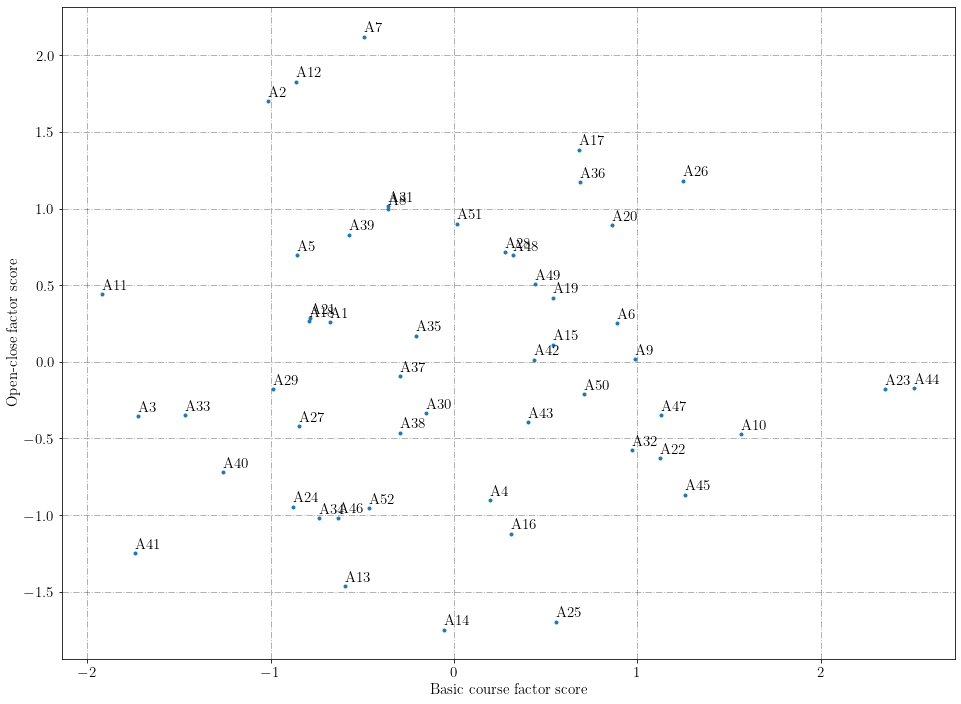

In [ ]:
import numpy as np
import pandas as pd
from sklearn import decomposition as dc
from scipy.stats import zscore
import matplotlib.pyplot as plt

c = np.array([
    [62, 71, 64, 75, 70, 68], [52, 65, 57, 67, 60, 58], [51, 63, 55, 97, 78, 77], [68, 77, 85, 83, 74, 57],
    [64, 70, 55, 76, 69, 62], [84, 81, 79, 72, 59, 50], [65, 67, 57, 49, 61, 51], [62, 73, 64, 77, 60, 50],
    [75, 94, 80, 67, 63, 45], [92, 92, 88, 61, 65, 54], [41, 67, 50, 79, 75, 81], [58, 66, 56, 53, 61, 68],
    [70, 65, 76,100, 82, 69], [74, 81, 76,100, 79, 68], [71, 85, 77, 83, 56, 54], [73, 85, 80, 79, 73, 73],
    [78, 74, 76, 60, 54, 41], [68, 66, 60, 80, 69, 73], [82, 77, 73, 81, 53, 61], [78, 76, 82, 67, 56, 37],
    [60, 70, 63, 75, 76, 54], [84, 89, 86, 70, 62, 69], [100,99, 95, 49, 58, 50], [62, 71, 66, 97, 82, 60],
    [87, 87, 77, 92, 78, 63], [85, 82, 80, 61, 50, 39], [59, 72, 66, 78, 82, 63], [72, 76, 74, 64, 58, 64],
    [58, 66, 66, 83, 72, 79], [73, 75, 70, 80, 69, 72], [68, 74, 60, 65, 61, 68], [83, 92, 79, 77, 65, 55],
    [58, 60, 59, 91, 82, 68], [63, 76, 66, 95, 77, 74], [65, 73, 73, 69, 71, 59], [83, 77, 73, 45, 64, 47],
    [61, 80, 69, 84, 67, 60], [63, 77, 73, 81, 75, 58], [63, 60, 70, 73, 68, 50], [49, 71, 66, 85, 80, 81],
    [53, 63, 60, 99, 89, 81], [75, 80, 78, 64, 66, 65], [76, 80, 79, 73, 65, 73], [100,96,100, 65, 47, 50],
    [88, 91, 86, 75, 65, 60], [68, 78, 64, 87, 79, 79], [87, 87, 83, 70, 62, 60], [68, 74, 80, 60, 63, 52],
    [74, 82, 74, 56, 65, 59], [89, 82, 73, 79, 63, 59], [75, 74, 66, 52, 70, 55], [70, 73, 70, 88, 79, 69]
])
d = zscore(c)  #数据标准化
r = np.corrcoef(d.T)  #求相关系数矩阵
val, vec = np.linalg.eig(r)
cs = np.cumsum(val)  #求特征值的累加和
print("特征值为：", val, "\n累加和为：", cs)
fa = dc.FactorAnalysis(n_components = 2)  #构建模型
fa.fit(d)  #求解最大方差的模型
print("载荷矩阵为：\n", fa.components_)
print("特殊方差为：\n", fa.noise_variance_)
dd = fa.fit_transform(d)  #计算因子得分
w = val[:2]/sum(val[:2])  #计算两个因子的权重
df = np.dot(dd, w)  #计算每个评价对象的因子总分
tf = np.sum(c, axis=1)  #计算每个评价对象的实分总分\
#构造pandas数据框, 第1列到第5列数据分别为因子1得分，因子2得分，因子总分、实分总分和序号
pdf = pd.DataFrame(np.c_[dd, df, tf, np.arange(1, 53)], columns=['f1得分', 'f2得分', '因子总分', '实际分数', '序号'])
spdf1 = pdf.sort_values(by='因子总分', ascending = False)  #y因子总分从高到低排序
spdf2 = pdf.sort_values(by='实际分数', ascending=False)  #实分总分从高到低排序
print('-'*60, '\n', "排序结果为：\n")
print("按因子总分排序\n", spdf1, '\n', "按实际总分排序\n", spdf2)

s = ['A'+str(i) for i in range(1, 53)]
plt.figure(figsize=(16, 12))
plt.rc('font', size=15)
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.plot(dd[:, 0], dd[:, 1], '.')
for i in range(len(s)):
    plt.text(dd[i, 0], dd[i, 1] + 0.03, s[i])
plt.xlabel("Basic course factor score")
plt.ylabel("Open-close factor score")
plt.show()

## 4. 聚类分析
聚类分析又称群分析, 它是研究分类问题的一种多元统计分析. 所谓类, 通俗地说, 就是指相似元素的集合. 要将相似元素聚为一类, 通常选取元素的许多共同指标, 然后通过分析元素的指标值来分辨元素间的差距, 从而达到分类的目的. 聚类分析可以分为 **$Q$ 型聚类 (样本聚类)、 $R$ 型聚类 (指标聚类)**.
聚类分析内容非常丰富, 有**层次聚类法、有序样品聚类法、动态聚类法、模糊聚类法、图论聚类法**等. 本节主要介绍常用的**层次聚类、 $K$ 均值聚类**.

### 4.1 数据变换
设有 $n$ 个样品, 每个样品测得 $p$ 项指标 (变量), 原始数据阵为
$$
\boldsymbol{A}=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1 p} \\
a_{21} & a_{22} & \cdots & a_{2 p} \\
\vdots & \vdots & & \vdots \\
a_{n 1} & a_{n 2} & \cdots & a_{n p}
\end{array}\right]
$$
其中 $a_{i j}(i=1, \cdots, n ; j=1, \cdots, p)$ 为第 $i$ 个样品 $\boldsymbol{\omega}_{i}$ 的第 $j$ 个指标的观测数据. 由于样本数据矩阵由多个指标组成, 不同指标一般有不同的量纲, 为消除量纲的影响, 通常需要进行数据变换处理. 常用的数据变换方法有以下两种.
#### (1) 规格化变换
规格化变换是从数据矩阵的每一个变量值中找出其最大值和最小值, 这两者之差称为极差, 然后从每个变量值的原始数据中减去该变量值的最小值, 再除以极差, 就得到规格化数据, 即有
$$
b_{i j}=\frac{a_{i j}-\min _{1 \leqslant i \leqslant n}\left(a_{i j}\right)}{\max _{1 \leqslant i \leqslant n}\left(a_{i j}\right)-\min _{1 \leqslant i \leqslant n}\left(a_{i j}\right)} \quad(i=1, \cdots, n ; j=1, \cdots, p) .
$$
#### (2) 标准化变换
首先对每个变量进行中心化变换, 然后用该变量的标准差进行标准化, 即有
$$
b_{i j}=\frac{a_{i j}-\mu_{j}}{s_{j}} \quad(i=1, \cdots, n ; j=1, \cdots, p),
$$
其中 $\mu_{j}=\frac{\sum_{i=1}^{n} a_{i j}}{n}, s_{j}=\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}\left(a_{i j}-\mu_{j}\right)^{2}}$. 记变换处理后的数据矩阵为
$$
\boldsymbol{B}=\left[\begin{array}{cccc}
b_{11} & b_{12} & \cdots & b_{1 p} \\
b_{21} & b_{22} & \cdots & b_{2 p} \\
\vdots & \vdots & & \vdots \\
b_{n 1} & b_{n 2} & \cdots & b_{n p}
\end{array}\right] \tag{(13)}
$$

### 4.2 样品间亲疏程度的测度计算
研究样品的亲疏程度或相似程度的数量指标通常有两种: 一种是**相似系数**, 性质越接近的样品, 其取值越接近于 1 或 $-1$, 而彼此无关的样品相似系数则接近于 0 , 相似的归为一类, 不相似的归为不同类. 另一种是**距离**, 它将每个样品看成 $p$ 维空间的一个点, $n$ 个样品组成 $p$ 维空间的 $n$ 个点. 用各点之间的距离来衡量各样品之间的相似程度. 距离近的点归为一类, 距离远的点属于不同的类.
#### 4.2.1 常用距离的计算
令 $d_{i j}$ 表示样品 $\omega_{i}$ 与 $\omega_{j}$ 的距离. 常用的距离有以下几种.
##### (1) 闵氏 (Minkowski) 距离
$$
d_{i j}(q)=\left(\sum_{k=1}^{p}\left|b_{i k}-b_{j k}\right|^{q}\right)^{1 / q} .
$$
当 $q=1$ 时,
$$
d_{i j}(1)=\sum_{k=1}^{p}\left|b_{i k}-b_{j k}\right| \text {, 即绝对值距离. }
$$
当 $q=2$ 时,
$$
d_{i j}(2)=\left(\sum_{k=1}^{p}\left(b_{i k}-b_{j k}\right)^{2}\right)^{1 / 2} \text {, 即欧氏距离. }
$$
当 $q=\infty$ 时,
$$
d_{i j}(\infty)=\max _{1 \leqslant k \leqslant p}\left|b_{i k}-b_{j k}\right| \text {, 即切比雪夫距离. }
$$
##### (2) 马氏 (Mahalanobis) 距离
马氏距离是由印度统计学家马哈拉诺比斯于 1936 年定义的, 故称为马氏距离. 其计算公式为
$$
d_{i j}=\sqrt{\left(\boldsymbol{B}_{i}-\boldsymbol{B}_{j}\right) \boldsymbol{\Sigma}^{-1}\left(\boldsymbol{B}_{i}-\boldsymbol{B}_{j}\right)^{\mathrm{T}}},
$$
这里 $\boldsymbol{B}_{i}$ 表示矩阵 $\boldsymbol{B}$ 的第 $i$ 行, $\boldsymbol{\Sigma}$ 表示观测变量之间的协方差阵, $\boldsymbol{\Sigma}=\left(\sigma_{i j}\right)_{p \times p}$, 其中
$$
\sigma_{i j}=\frac{1}{n-1} \sum_{k=1}^{n}\left(b_{k i}-\mu_{i}\right)\left(b_{k j}-\mu_{j}\right),
$$
这里 $\mu_{j}=\frac{1}{n} \sum_{k=1}^{n} b_{k j}$.

#### 4.2.2 相似系数的计算
研究样品之间的关系, 除了用距离表示外, 还有相似系数. 相似系数是描述样品之间相似程度的一个统计量, 常用的相似系数有以下几种.
##### (1) 夹角余弦
将任何两个样品 $\omega_{i}$ 与 $\omega_{j}$ 看成 $p$ 维空间的两个向量, 这两个向量的夹角余弦 用 $\cos \theta_{i j}$ 表示, 则
$$
\cos \theta_{i j}=\frac{\sum_{k=1}^{p} b_{i k} b_{j k}}{\sqrt{\sum_{k=1}^{p} b_{i k}^{2}} \cdot \sqrt{\sum_{k=1}^{p} b_{j k}^{2}}}, \quad i, j=1,2, \cdots, n
$$
当 $\cos \theta_{i j}=1$ 时, 说明两个样品 $\omega_{i}$ 与 $\omega_{j}$ 完全相似; $\cos \theta_{i j}$ 接近 1 时, 说明 $\omega_{i}$ 与 $\omega_{j}$ 相似密切; $\cos \theta_{i j}=0$ 时, 说明 $\omega_{i}$ 与 $\omega_{j}$ 完全不一样; $\cos \theta_{i j}$ 接近 0 时, 说明 $\omega_{i}$ 与 $\omega_{j}$ 差别大. 把所有两两样品的相似系数都计算出来, 可排成相似系数矩阵
$$
\boldsymbol{\Theta}=\left[\begin{array}{cccc}
\cos \theta_{11} & \cos \theta_{12} & \cdots & \cos \theta_{1 n} \\
\cos \theta_{21} & \cos \theta_{22} & \cdots & \cos \theta_{2 n} \\
\vdots & \vdots & & \vdots \\
\cos \theta_{n 1} & \cos \theta_{n 2} & \cdots & \cos \theta_{n n}
\end{array}\right]
$$
其中 $\cos \theta_{11}=\cdots=\cos \theta_{n n}=1$. **根据 $\Theta$ 可对 $n$ 个样品进行分类, 把比较相似的样品归为一类, 不怎么相似的样品归为不同的类.**
##### (2) 皮尔逊相关系数
第 $i$ 个样品与第 $j$ 个样品之间的相关系数定义为
$$
r_{i j}=\frac{\sum_{k=1}^{p}\left(b_{i k}-\bar{\mu}_{i}\right)\left(b_{j k}-\bar{\mu}_{j}\right)}{\sqrt{\sum_{k=1}^{p}\left(b_{i k}-\bar{\mu}_{i}\right)^{2}} \cdot \sqrt{\sum_{k=1}^{p}\left(b_{j k}-\bar{\mu}_{j}\right)^{2}}}, \quad i, j=1,2, \cdots, n,
$$
其中, $\bar{\mu}_{i}=\frac{\sum_{k=1}^{p} b_{i k}}{p}$.
实际上, $r_{i j}$ 就是两个向量 $\boldsymbol{B}_{i}-\overline{\boldsymbol{B}}_{i}$ 与 $\boldsymbol{B}_{j}-\overline{\boldsymbol{B}}_{j}$ 的夹角余弦, 其中 $\overline{\boldsymbol{B}}_{i}=$ $\bar{\mu}_{i}[1,2, \cdots, 1]$. 若将原始数据标准化, 满足 $\overline{\boldsymbol{B}}_{i}=\overline{\boldsymbol{B}}_{j}=0$, 这时 $r_{i j}=\cos \theta_{i j}$.
$$
\boldsymbol{R}=\left(r_{i j}\right)_{n \times n}=\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
r_{21} & r_{22} & \cdots & r_{2 n} \\
\vdots & \vdots & & \vdots \\
r_{n 1} & r_{n 2} & \cdots & r_{n n}
\end{array}\right]
$$
其中 $r_{11}=\cdots=r_{n n}=1$, 可根据 $\boldsymbol{R}$ 对 $n$ 个样品进行分类.

### 4.3 scipy.cluster.hierarchy模块的层次聚类
scipy.cluster.hierarchy 模块的层次聚类函数介绍如下.
#### 4.3.1 distance.pdist
$\mathrm{B}=\operatorname{pdist}(\mathrm{A}$, metric= ' euclidean' ) 用 metric 指定的方法计算 $n \times p$ 矩阵 $\mathrm{A}$ (看作 $n$ 个 $p$ 维行向量, 每行是一个对象的数据) 中两两对象间的距离, metric 可取下表中的特征字符串. 输出 B 是包含距离信息的长度为 $(n-1) \cdot n / 2$ 的向量. 可用 distance.squareform 函数将此向量转换为方阵, 这样可使矩阵中的 $(i, j)$ 元素对应原始数据集中对象 $i$ 和 $j$ 间的距离.
表 常用的 'metric' 取值及含义
\begin{array}{cc}
\hline 字符串 & \multicolumn{1}{c}{ 含义 } \\
\hline
\text{'euclidean'} & 欧氏距离 (缺省值) \\
\text{'cityblock'} & 绝对值距离 \\
\text{'minkowski'} & \text{Minkowski 距离} \\
\text{'chebychev'} & \text{Chebychev 距离} \\
\text{'mahalanobis'} & \text{Mahalanobis 距离} \\
\hline
\end{array}
metric 的取值很多, 读者可以自己看帮助.
#### 4.3.2 linkage
$\mathrm{Z}=$ linkage(B, 'method') 使用由 'method' 指定的算法计算**生成聚类树**, 输入矩阵 $\mathrm{B}$ 为 pdist 函数输出的 $n \cdot(n-1) / 2$ 维距离行向量, 'method' 可取下表中特征字符串值。
表 'metric'取值及含义.
\begin{array}{cc}
\hline \text { 字符串 } & \multicolumn{1}{c}{\text { 含义 }} \\
\hline \text { 'single' } & \text { 最短距离 (缺省值) } \\
\text { 'average' } & \text { 无权平均距离 } \\
\text { 'centroid' } & \text { 重心距离 } \\
\text { 'complete' } & \text { 最大距离 } \\
\text { 'ward' } & \text { 离差平方和方法 (Ward 方法) } \\
\hline
\end{array}
输出 $\mathrm{Z}$ 为包含聚类树信息的 $(n-1) \times 4$ 矩阵. 聚类树上的叶节点为原始数据集中的对象, 其编号由 0 到 $n-1$, 它们是单元素的类, 级别更高的类都由它们生成. 对应于 Z 中第 $j$行每个新生成的类, 其索引为 $n+j$, 其中 $n$ 为初始叶节点的数量.
$\mathrm{Z}$ 的第 1 列和第 2 列, 即 $\mathrm{Z}[:,: 2]$ 包含了被两两连接生成一个新类的所有对象的索引. Z [j, :2] 生成的新类索引为 $n+j$. 共有 $n-1$ 个级别更高的类, 它们对应于聚类树中的内部节点.
$\mathrm{Z}$ 的第 3 列 Z [:, 2] 包含了相应的在类中的两两对象间的连接距离. Z 的第 4 列 Z [:,3] 表示当前类中原始对象的个数.
#### 4.3.3 fcluster
$\mathrm{T}=$ fcluster $(\mathrm{Z}, \mathrm{t})$ 从 linkage 的输出 $\mathrm{Z}$, 根据给定的阈值 $\mathrm{t}$ 创建聚类.
#### 4.3.4 H=dendrogram(Z, p)
由 linkage 产生的数据矩阵 $Z$ **画聚类树状图**. $p$ 是结点数, 默认值是 $30$ .

### 4.4 基于类间距离的层次聚类
层次聚类法是聚类分析方法中使用最多的方法. 其基本思想是: 距离相近的样 品 (或变量) 先聚为一类, 距离远的后聚成类, 此过程一直进行下去, 每个样品总能聚到合适的类中. 它包括如下步骤：
(1) 将每个样品独自聚成一类, 构造 $n$ 个类.
(2) 根据所确定的样品距离公式, 计算 $n$ 个样品 (或变量) 两两间的距离, 构造距离矩阵, 记为 $\boldsymbol{D}_{(0)}$.
(3) 把距离最近的两类归为一新类, 其他样品仍各自聚为一类, 共聚成 $n-1$ 类.
(4) 计算新类与当前各类的距离, 将距离最近的两个类进一步聚成一类, 共聚成 $n-2$ 类. 以上步骤一直进行下去, 最后将所有的样品聚成一类.
(5) 画聚类谱系图.
(6) 决定类的个数及各类包含的样品数, 并对类做出解释.
正如样品之间的距离可以有不同的定义方法一样, **类与类之间的距离也有各种定义*. 例如, 可以定义类与类之间的距离为两类之间最近样品的距离, 或者定义为两类之间最远样品的距离, 也可以定义为两类重心之间的距离等. 类与类之间用不同的方法定义距离, 就产生了不同的层次聚类方法. 常用的层次聚类方法有, **最短距离法、最长距离法、中间距离法、重心法、类平均法、可变类平均法、可变法和离差平方和法**.
下面介绍两种常用的层次聚类法.

#### 4.4.1 最短距离法
最短距离法定义类 $G_{i}$ 与 $G_{j}$ 之间的距离为两类间最邻近的两样品之距离, 即 $G_{i}$ 与 $G_{j}$ 两类间的距离 $D_{i j}$ 定义为
$$
D_{i j}=\min _{\omega_{s} \in G_{i}, \omega_{t} \in G_{j}} d_{s t} .
$$
设类 $G_{p}$ 与 $G_{q}$ 合并成一个新类记为 $G_{r}$, 则任一类 $G_{k}$ 与 $G_{r}$ 的距离是
$$
D_{k r}=\min _{\omega_{i} \in G_{k}, \omega_{j} \in G_{r}} d_{i j}=\min \left\{\min _{\boldsymbol{\omega}_{i} \in G_{k}, \omega_{j} \in G_{p}} d_{i j}, \min _{\omega_{i} \in G_{k}, \omega_{j} \in G_{q}} d_{i j}\right\}=\min \left\{D_{k p}, D_{k q}\right\} .
$$
最短距离法聚类的步骤如下:
(1) 定义样品之间的距离: 计算样品两两间的距离, 得一距离矩阵记为 $\boldsymbol{D}_{(0)}=\left(d_{i j}\right)_{n \times n}$, 开始每个样品自成一类, 显然这时 $D_{i j}=d_{i j}$.
(2) 找出 $\boldsymbol{D}_{(0)}$ 的非对角线最小元素, 设为 $d_{p q}$, 则将 $G_{p}$ 和 $G_{q}$ 合并成一个新类, 记为 $G_{r}$, 即 $G_{r}=\left\{G_{p}, G_{q}\right\}$.
(3) 给出计算新类与其他类的距离公式:
$$
D_{k r}=\min \left\{D_{k p}, D_{k q}\right\} .
$$
将 $\boldsymbol{D}_{(0)}$ 中第 $p, q$ 行及 $p, q$ 列, 用上面公式合并成一个新行新列, 新行新列对应 $G_{r}$, 所得到的矩阵记为 $\boldsymbol{D}_{(1)}$.
(4) 对 $\boldsymbol{D}_{(1)}$ 重复上述类似 $\boldsymbol{D}_{(0)}$ 的 (2), (3) 两步得到 $\boldsymbol{D}_{(2)}$. 如此下去, 直到所有的元素并成一类为止.
**如果某一步 $\boldsymbol{D}_{(k)}$ 中非对角线最小的元素不止一个, 则对应这些最小元素的类可以同时合并.**

**例** 在某地区有 7 个矽卡岩体, 对 7 个岩体的三种元素 $\mathrm{Cu}, \mathrm{W}, \mathrm{Mo}$ 作 分析的原始数据见表 11.11, 对这 7 个样品进行聚类.

表 7个矽卡岩体数据
\begin{array}{cccccccc}
\hline & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\hline
\mathrm{Cu} & 2.9909 & 3.2044 & 2.8392 & 2.5315 & 2.5897 & 2.9600 & 3.1184 \\
\mathrm{W} & 0.3111 & 0.5348 & 0.5696 & 0.4528 & 0.3010 & 3.0480 & 2.8395 \\
\mathrm{Mo} & 0.5324 & 0.7718 & 0.7614 & 0.4893 & 0.2735 & 1.4997 & 1.9850 \\
\hline
\end{array}
数学原理及聚类过程就不慗述了. 按照最短距离聚类时, 所画的聚类图如程序运行图所示. 如果取阈值 $d=0.5$, 则可把这些岩体划分成两类, $6,7$ 为一类, $1, 2, \cdots, 5$ 为另一类.

[[ 3.          4.          0.16258132  2.        ]
 [ 0.          2.          0.27853564  2.        ]
 [ 1.          8.          0.35618248  3.        ]
 [ 5.          6.          0.37626539  2.        ]
 [ 7.          9.          0.47781458  5.        ]
 [10.         11.          1.01602914  7.        ]]


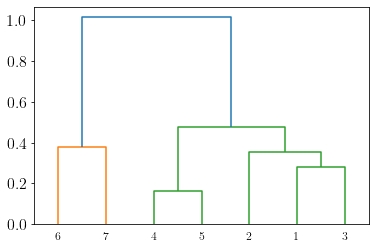

In [ ]:
import numpy as np
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

a = np.array([
    [2.9909, 3.2044, 2.8392, 2.5315, 2.5897, 2.9600, 3.1184],
    [0.3111, 0.5348, 0.5696, 0.4528, 0.3010, 3.0480, 2.8395],
    [0.5324, 0.7718, 0.7614, 0.4893, 0.2735, 1.4997, 1.9850]
])
b = pp.minmax_scale(a.T)  #数据规格化
d = sch.distance.pdist(b)  #求对象之间的两两距离向量
dd = sch.distance.squareform(d)  #转换为矩阵格式
z = sch.linkage(d)
print(z)  #进行聚类并显示

s=[str(i+1) for i in range(7)]
plt.rc('font', size=16)
sch.dendrogram(z, labels=s)
plt.show()  #画聚类图

#### 4.4.2 最长距离法
定义类 $G_{i}$ 与类 $G_{j}$ 之间的距离为两类最远样品的距离, 即
$$
D_{i j}=\max _{\omega_{s} \in G_{i}, \omega_{t} \in G_{j}} d_{s t} .
$$
最长距离法与最短距离法的合并步骤完全一样, 也是将各样品先自成一类, 然后将非对角线上最小元素对应的两类合并. 设某一步将类 $G_{p}$ 与 $G_{q}$ 合并为 $G_{r}$, 则 任一类 $G_{k}$ 与 $G_{r}$ 的最长距离公式为
$$
D_{k r}=\max _{\omega_{i} \in G_{k}, \omega_{j} \in G_{r}} d_{i j}=\max \left\{\max _{\omega_{i} \in G_{k}, \omega_{j} \in G_{p}} d_{i j}, \max _{\omega_{i} \in G_{k}, \omega_{j} \in G_{q}} d_{i j}\right\}=\max \left\{D_{k p}, D_{k q}\right\} .
$$
再找非对角线最小元素对应的两类并类, 直至所有的样品全归为一类为止.
可见, 最长距离法与最短距离法只有两点不同, 一是类与类之间的距离定义不同; 二是计算新类与其他类的距离所用的公式不同.

**例** 用最长距离法对上例 7 个矽卡岩体进行聚类. 所画的聚类图如程序输出图所示. 聚类结果和上例是一样的.

[[ 3.          4.          0.16258132  2.        ]
 [ 0.          2.          0.27853564  2.        ]
 [ 5.          6.          0.37626539  2.        ]
 [ 1.          8.          0.54290736  3.        ]
 [ 7.         10.          1.01397033  5.        ]
 [ 9.         11.          1.57203348  7.        ]]


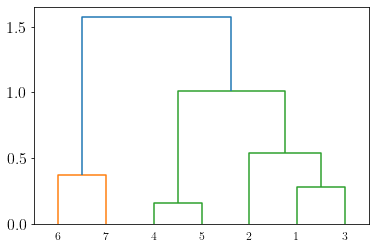

In [ ]:
import numpy as np
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

a = np.array([
    [2.9909, 3.2044, 2.8392, 2.5315, 2.5897, 2.9600, 3.1184],
    [0.3111, 0.5348, 0.5696, 0.4528, 0.3010, 3.0480, 2.8395],
    [0.5324, 0.7718, 0.7614, 0.4893, 0.2735, 1.4997, 1.9850]
])
b = pp.minmax_scale(a.T)  #数据规格化
d = sch.distance.pdist(b)  #求对象之间的两两距离向量
z = sch.linkage(d, 'complete')  #'complete'即按最长距离法计算
print(z)  #进行聚类并显示
s = [str(i+1) for i in range(7)]
plt.rc('font', size=16)
sch.dendrogram(z, labels=s)
plt.show()  #画聚类图

### 4.5 K均值聚类
用层次聚类法聚类时, 随着聚类样本对象的增多, 计算量会迅速增加, 而且聚类结果一谱系图会十分复杂, 不便于分析. 特别是样品的个数很大 (如 $n \geqslant 100$ ) 时, 层次聚类法的计算量非常大, 将占据大量的计算机内存空间和较多的计算时间. 为了改进上述缺点, 一个自然的想法是先粗略地分一下类, 然后按某种最优原则进行修正, 直到将类分得比较合理为止. 基于这种思想就产生了**动态聚类法**, 也称**逐步聚类法**.
**动态聚类法适用于大型数据.** 动态聚类法有许多种方法, 这里介绍一种比较流行的动态聚类法——$K$ 均值法. 它是一种快速聚类法, 该方法得到的结果简单易懂, 对计算机的性能要求不高, 因而应用广泛. 该方法由麦克奎因 (Macqueen) 于 1967 年提出.
算法的思想是假定样本集中的全体样本可分为 $C$ 类, 并选定 $C$ 个初始聚类中心, 然后根据最小距离原则将每个样本分配到某一类中, 之后不断迭代计算各类的聚类中心, 并依据新的聚类中心调整聚类情况, 直到迭代收玫或聚类中心不再改变.
$K$ 均值聚类算法最后将总样本集 $G$ 划分为 $C$ 个子集: $G_{1}, G_{2}, \cdots, G_{C}$, 它们满足下面条件:
(1) $G_{1} \cup G_{2} \cup \cdots \cup G_{C}=G$;
(2) $G_{i} \cap G_{j}=\varnothing(1 \leqslant i<j \leqslant C)$;
(3) $G_{i} \neq \varnothing, G_{i} \neq G(1 \leqslant i \leqslant C)$.
设 $\boldsymbol{m}_{i}(i=1, \cdots, C)$ 为 $C$ 个聚类中心, 记
$$
J_{e}=\sum_{i=1}^{C} \sum_{\omega \in G_{i}}\left\|\omega-m_{i}\right\|^{2},
$$
使 $J_{e}$ 最小的聚类是**误差平方和准则**下的最优结果.
$K$ 均值聚类算法描述如下:
(1) 初始化. 设总样本集 $G=\left\{\boldsymbol{\omega}_{j}, j=1,2, \cdots, n\right\}$ 是 $n$ 个样品组成的集合, 聚类数为 $C(2 \leqslant C \leqslant n)$, 将样本集 $G$ **任意**划分为 $C$ 类, 记为 $G_{1}, G_{2}, \cdots, G_{C}$, 计算对应的 $C$ 个初始聚类中心, 记为 $\boldsymbol{m}_{1}, \boldsymbol{m}_{2}, \cdots, \boldsymbol{m}_{C}$, 并计算 $J_{e}$.
(2) $G_{i}=\varnothing(i=1,2, \cdots, C)$, 按最小距离原则将样品 $\boldsymbol{\omega}_{j}(j=1,2, \cdots, n)$ 进行聚 类, 即若 $d\left(\boldsymbol{\omega}_{j}, G_{k}\right)=\min _{1 \leqslant i \leqslant C} d\left(\boldsymbol{\omega}_{j}, \boldsymbol{m}_{i}\right)$, 则 $\boldsymbol{\omega}_{j} \in G_{k}, G_{k}=G_{k} \cup\left\{\boldsymbol{\omega}_{j}\right\}, j=1,2, \cdots, n$. 重新计算聚类中心
$$
\boldsymbol{m}_{i}=\frac{1}{n_{i}} \sum_{\boldsymbol{\omega}_{j} \in G_{i}} \boldsymbol{\omega}_{j}, \quad i=1,2, \cdots, C,
$$
式中, $n_{i}$ 为当前 $G_{i}$ 类中的样本数目, 并重新计算 $J_{e}$.
(3) 若连续两次迭代的 $J_{e}$ 不变, 则算法终止, 否则算法转 (2).
**注** 实际计算时, 可以不计算 $J_{e}$, 只要**聚类中心**不发生变化, 算法即可终止.

**例** 已知聚类的指标变量为 $x_{1}, x_{2}$, 四个样本点的数据分别为
$$
\boldsymbol{\omega}_{1}=(1,3), \quad \boldsymbol{\omega}_{2}=(1.5,3.2), \quad \boldsymbol{\omega}_{3}=(1.3,2.8), \quad \boldsymbol{\omega}_{4}=(3,1) .
$$
试用 $K$ 均值聚类法把样本点分成两类.

**解** 现要分为两类 $G_{1}$ 和 $G_{2}$, 设初始聚类为 $G_{1}=\left\{\boldsymbol{\omega}_{1}\right\}, G_{2}=\left\{\boldsymbol{\omega}_{2}, \boldsymbol{\omega}_{3}, \boldsymbol{\omega}_{4}\right\}$, 则初始聚类中心为
$G_{1}$ 类: $\boldsymbol{\omega}_{1}$ 值, 即 $\boldsymbol{m}_{1}=(1,3)$;
$G_{2}$ 类: $m_{2}=\left(\frac{1.5+1.3+3}{3}, \frac{3.2+2.8+1}{3}\right)=(1.9333,2.3333)$.
计算每个样本点到 $G_{1}, G_{2}$ 聚类中心的距离
$$
\begin{array}{ll}
d_{11}=\left\|\boldsymbol{\omega}_{1}-\boldsymbol{m}_{1}\right\|=\sqrt{(1-1)^{2}+(3-3)^{2}}=0, \quad d_{12}=\left\|\omega_{1}-\boldsymbol{m}_{2}\right\|=1.1470 ; \\
d_{21}=\left\|\omega_{2}-\boldsymbol{m}_{1}\right\|=0.5385, \quad d_{22}=\left\|\omega_{2}-\boldsymbol{m}_{2}\right\|=0.9690 ; \\
d_{31}=\left\|\omega_{3}-\boldsymbol{m}_{1}\right\|=0.3606, \quad d_{32}=\left\|\omega_{3}-\boldsymbol{m}_{2}\right\|=0.7867 ; \\
d_{41}=\left\|\omega_{4}-\boldsymbol{m}_{1}\right\|=2.8284, \quad d_{42}=\left\|\boldsymbol{\omega}_{4}-\boldsymbol{m}_{2}\right\|=1.7075 .
\end{array}
$$
得到新的划分为 $G_{1}=\left\{\boldsymbol{\omega}_{1}, \boldsymbol{\omega}_{2}, \boldsymbol{\omega}_{3}\right\}, G_{2}=\left\{\boldsymbol{\omega}_{4}\right\}$, 新的聚类中心为 $G_{1}$ 类: $\boldsymbol{m}_{1}=\left(\frac{1+1.5+1.3}{3}, \frac{3+3.2+2.8}{3}\right)=(1.2667,3.0)$;
$G_{2}$ 类: $\boldsymbol{\omega}_{4}$ 值, 即 $\boldsymbol{m}_{2}=(3,1)$.
重新计算每个样本点到 $G_{1}, G_{2}$ 聚类中心的距离
$$
\begin{array}{ll}
d_{11}=\left\|\boldsymbol{\omega}_{1}-\boldsymbol{m}_{1}\right\|=0.2667, & d_{12}=\left\|\boldsymbol{\omega}_{1}-\boldsymbol{m}_{2}\right\|=2.8284 \\
d_{21}=\left\|\boldsymbol{\omega}_{2}-\boldsymbol{m}_{1}\right\|=0.3073, & d_{22}=\left\|\boldsymbol{\omega}_{2}-\boldsymbol{m}_{2}\right\|=2.6627 \\
d_{31}=\left\|\boldsymbol{\omega}_{3}-\boldsymbol{m}_{1}\right\|=0.2028, & d_{32}=\left\|\boldsymbol{\omega}_{3}-\boldsymbol{m}_{2}\right\|=2.4759 \\
d_{41}=\left\|\boldsymbol{\omega}_{4}-\boldsymbol{m}_{1}\right\|=2.6466, & d_{42}=\left\|\boldsymbol{\omega}_{4}-\boldsymbol{m}_{2}\right\|=0 .
\end{array}
$$
所以, 得新的划分为: $G_{1}=\left\{\boldsymbol{\omega}_{1}, \boldsymbol{\omega}_{2}, \boldsymbol{\omega}_{3}\right\}, G_{2}=\left\{\boldsymbol{\omega}_{4}\right\}$.
可见，新的划分与前面的划分相同，聚类中心没有改变，聚类结束。

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

a = np.array([
    [1, 3], [1.5, 3.2], [1.3, 2.8], [3, 1]
])
md = KMeans(n_clusters=2)  #构建模型
md.fit(a)  #求解模型
labels = 1+md.labels_  #提取聚类标签
centers = md.cluster_centers_  #提取聚类中心,每一行是一个聚类中心
print(labels, '\n-----------\n',centers)

[1 1 1 2] 
-----------
 [[1.26666667 3.        ]
 [3.         1.        ]]


### 4.6 K均值聚类法最佳簇数k值的确定
对于 $K$ 均值聚类来说, 如何确定簇数 $k$ 值是一个至关重要的问题, 为了解决这个问题, 通常会选用探索法, 即给定不同的 $k$ 值, 对比某些评估指标的变动情况, 进而选择一个比较合理的 $k$ 值. 本节将介绍非常实用的两种评估方法, 即**簇内离差平方和拐点法**与**轮廓系数法**.
#### 4.6.1 簇内离差平方和拐点法
簇内离差平方和拐点法的思想很简单, 就是在不同的 $k$ 值下计算**簇内离差平方和**, 然后通过可视化的方法找到 “拐点” 所对应的 $k$ 值. 重点关注的是斜率的变化, 当斜率由大突然变小时, 并且之后的斜率变化缓慢, 则认为突然变换的点就是寻找的目标点, 因为继续随着簇数 $k$ 的增加, 聚类效果不再有大的变化.
为了验证这个方法的直观性, 这里随机生成三组二维正态分布数据, 首先基于该数据绘制散点图如程序运行图所示, 模拟的数据呈现三个簇. 接下来基于这个模拟数据, 使用拐点法, 绘制簇的个数与总的簇内离差平方和之间的折线图亦如程序运行图所示.
从折线图可以看出, 当簇的个数为 3 时形成了一个明显的拐点, 3 之后的簇对应的簇内离差平方和的变动都很小, 合理的 $k$ 值应该为 3, 与模拟的三个簇数据是吻合的.

d:\programme\python\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  "KMeans is known to have a memory leak on Windows "


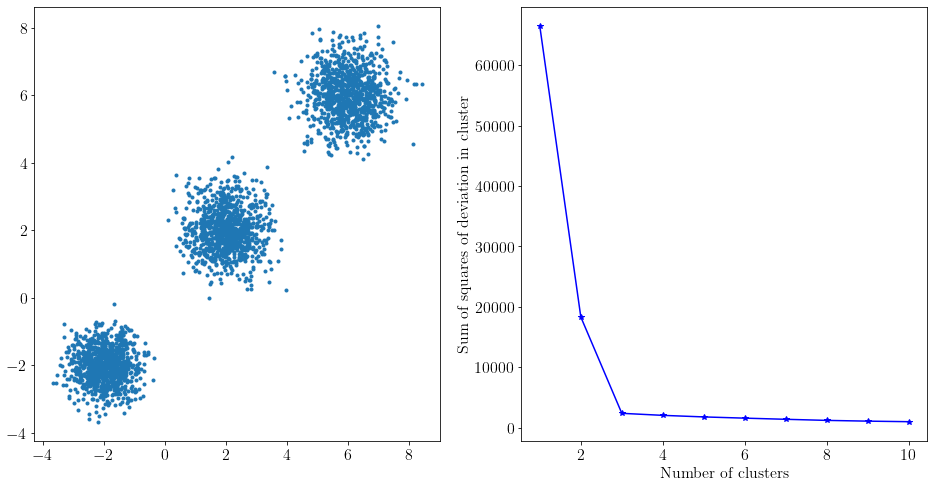

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

mean = np.array([
    [-2, -2], [2, 2], [6,6]
])
cov = np.array([
    [[0.3, 0], [0, 0.3]],
    [[0.4, 0], [0, 0.4]],
    [[0.5, 0], [0, 0.5]]
])
x0=[]
y0=[]
for i in range(3):
    x, y = np.random.multivariate_normal(mean[i], cov[i], 1000).T
    x0 = np.hstack([x0, x])
    y0 = np.hstack([y0, y])

plt.figure(figsize=(16, 8))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)
plt.subplot(121)
plt.scatter(x0, y0, marker='.')  #画模拟数据散点图

X = np.vstack([x0, y0]).T
TSSE = []
K = 10
for k in range(1, K + 1):
    SSE = []
    md = KMeans(n_clusters=k)
    md.fit(X)
    labels = md.labels_
    centers = md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((X[labels == label, :] - centers[label, :])**2))
    TSSE.append(np.sum(SSE))
plt.subplot(122)
plt.style.use('ggplot')
# print(plt.style.available)
plt.plot(range(1, K+1), TSSE, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares of deviation in cluster')
plt.show()

#### 4.6.2 轮廓系数法

该方法综合考虑了簇的**密集性**与**分散性**两个信息, 如果数据集被分割为理想的 $k$ 个簇, 那么对应的簇内样本会很密集, 而簇间样本会很分散.
如下图所示, 假设数据集被拆分为三个簇 $G_{1}, G_{2}, G_{3}$, 样本点 $i$ 对应的 $a_{i}$ 值为所有 $G_{1}$ 中其他样本点与样本点 $i$ 的距离平均值; 样本点 $i$ 对应的 $b_{i}$ 值分两步 计算, 首先计算该点分别到 $G_{2}$ 和 $G_{3}$ 中样本点的平均距离, 然后将两个平均值中的最小值作为 $b_{i}$ 的度量.
![](./images/轮廓系数计算示意图.png)
图 轮廓系数计算示意图
定义样本点 $i$ 的轮廓系数
$$
S_{i}=\frac{b_{i}-a_{i}}{\max \left(a_{i}, b_{i}\right)} \tag{(14)}
$$
$k$ 个簇的总轮廓系数定义为所有样本点轮廓系数的平均值.
当总轮廓系数小于 0 时, 说明聚类效果不佳; 当总轮廓系数接近于 1 时, 说明簇内样本的平均距离非常小, 而簇间的最近距离非常大, 进而表示聚类效果非常理想.
上面的计算思想虽然简单, 但是计算量是很大的, 当样本量比较多时, 运行时间会比较长. 有关轮廓系数的计算, 可以直接调用 sklearn.metrics 中的函数 silhouettescore. 需要注意的是, 该函数接受的聚类簇数必须大于等于 2.
利用上面同样的模拟数据, 画出的簇数与轮廓系数对应关系图如下图所示, 当 $k$ 等于 3 时, 轮廓系数最大, 且比较接近于 1 , 说明应该把模拟数据聚为 3 类比 较合理, 同样与模拟数据的三个簇是吻合的.

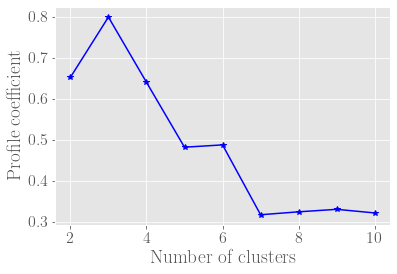

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

X = np.load("./data/K均值聚类_轮廓系数法.npy")
S = []
K = 10
for k in range(2, K + 1):
    md = KMeans(k)
    md.fit(X)
    labels = md.labels_
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))  #计算轮廓系数

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.plot(range(2, K + 1), S, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Profile coefficient')
plt.show()

### 4.7 K均值聚类的应用

在做 $K$ 均值聚类时需要注意两点, 一个是聚类前必须指定具体的簇数 $k$ 值, 如果 $k$ 值是已知的, 可以直接调用 cluster 子模块中的 KMeans 函数, 对数据集进行分 割; **如果 $k$ 值是末知的, 可以根据行业经验或前面介绍的两种方法确定合理的 $k$ 值.** 另一个是对原始数据集做必要的**标准化处理**. 由于 $K$ 均值的思想是基于点之间的距离实现 “物以类聚” 的, 所以如果原始数据集存在量纲上的差异, 就必须对其进行标准化的预处理. 数据集的标准化预处理可以借助 sklearn 子模块 preprocessing 中的 scale 函数或 minmax_scale 函数. scale 函数的标准化公式为
$$
x^{*}=\frac{x-\mu}{\sigma},
$$
minmax_scale 函数的标准化公式为
$$
x^{*}=\frac{x-x_{\min }}{x_{\max }-x_{\min }}
$$
其中, $\mu, \sigma, x_{\min }, x_{\max }$ 分别为 $x$ 取值的均值、标准差、最小值和最大值.

Iris 数据集是常用的分类实验数据集, 下面用该数据集来验证 $K$ 均值聚类的效果.
**例** Iris 数据集由 Fisher 于 1936 年收集整理. Iris 也称鸢尾花卉数据, 是一类多重变量分析的数据集. 数据集包含 150 个数据, 分为 3 类, 每类 50 个数 据, 每个数据包含 4 个属性, 数据格式如下表所示. 可通过花萼长度、花萼宽度、花瓣长度、花瓣宽度 4 个属性预测鸢尾花卉属于 (setosa, versicolour, virginica) 三个种类中的哪一类.
表 Iris数据集数据
\begin{array}{cccccc}
\hline
& \text{Sepal_Length} & \text{Sepal_Width} & \text{Petal_Length} & \text{Petal_Width} & \text{Species} \\
\hline
1 & 5.1 & 3.5 & 1.4 & 0.2 & \text{setosa} \\
2 & 4.9 & 3 & 1.4 & 0.2 & \text{setosa} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
149 & 6.2 & 3.4 & 5.4 & 2.3 & \text{virginica} \\
150 & 5.9 & 3 & 5.1 & 1.8 & \text{virginica} \\
\hline
\end{array}
如上表所示, 数据集的前 4 个变量分别为花萼的长度、宽度及花瓣的长度、宽度, 它们之间没有量纲上的差异, 故无需对其做标准化预处理, 最后一个变量为戈尾花所属的种类. 如果将其聚为 3 类, 所得结果为各簇样本量分别为 $60,50,38$. 为了直观验证聚类效果, 对比建模后的 3 类与原始数据 3 类的差异, 绘制花瓣长度与宽度的散点图如程序输出图所示.

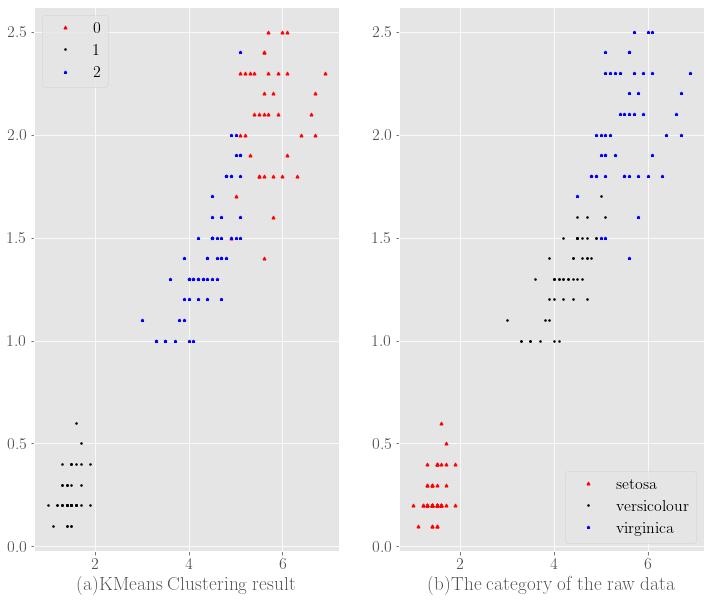

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

a = pd.read_csv("./data/K均值聚类的应用_iris.csv")
b = a.iloc[:, :-1]
md = KMeans(3)
md.fit(b)  #构建模型并求解模型
labels = md.labels_
centers = md.cluster_centers_
b['cluster'] = labels  #数据框b添加一个列变量cluster
c = b.cluster.value_counts()  #各类频数统计

plt.figure(figsize=(12, 10))
plt.style.use('ggplot')
plt.rc('font',family='SimHei')
plt.rc('font',size=16)
str1 = ['^r','.k','*b']
plt.subplot(121)
for i in range(len(centers)):
    plt.plot(b['Petal_Length'][labels==i], b['Petal_Width'][labels==i], str1[i], markersize=3, label=str(i))
    plt.legend()
    plt.xlabel("(a)KMeans Clustering result")
plt.subplot(122)
str2 = ['setosa', 'versicolour', 'virginica']
ind = np.hstack([np.zeros(50), np.ones(50), 2*np.ones(50)])
for i in range(3):
    plt.plot(b['Petal_Length'][ind==i], b['Petal_Width'][ind==i], str1[i], markersize=3, label=str2[i])
    plt.legend(loc='lower right')
    plt.xlabel("(b)The category of the raw data")
plt.show()